## Feature_Engineering&Model_Tuning Project

#### The project was accomplished by employing supervised learning, ensemble modeling, and unsupervised learning techniques to build and train a prediction model to identify Pass/Fail yield of a particular process entity for a semiconductor manufacturing company. 
#### This project helps to determine key factors contributing to yield excursions downstream in the process and will enable an increase in process throughput, decreased time to learn and reduce per-unit production costs. 

In [186]:
# Importing all the relevant libraries

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
from scipy.stats import ttest_ind
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix ,  accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle

### 1. IMPORTING DATA

In [188]:
df= pd.read_csv("signal_data.csv") # Reading signal dataset

In [189]:
df.shape #shape of the dataset

(1567, 592)

In [190]:
df.head(2) 

Time        0        1          2          3       4      5  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   

          6       7       8  ...       581     582     583     584     585  \
0   97.6133  0.1242  1.5005  ...       NaN  0.5005  0.0118  0.0035  2.3630   
1  102.3433  0.1247  1.4966  ...  208.2045  0.5019  0.0223  0.0055  4.4447   

      586     587    588       589  Pass/Fail  
0     NaN     NaN    NaN       NaN         -1  
1  0.0096  0.0201  0.006  208.2045         -1  

[2 rows x 592 columns]

In [191]:
df.info() # info regarding all the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


#### 1.B: 5 Point Summary

In [192]:
stats_summary=df.describe().T # 5 point summary of all the columns
stats_summary.head(20)

count         mean         std        min          25%         50%  \
0   1561.0  3014.452896   73.621787  2743.2400  2966.260000  3011.49000   
1   1560.0  2495.850231   80.407705  2158.7500  2452.247500  2499.40500   
2   1553.0  2200.547318   29.513152  2060.6600  2181.044400  2201.06670   
3   1553.0  1396.376627  441.691640     0.0000  1081.875800  1285.21440   
4   1553.0     4.197013   56.355540     0.6815     1.017700     1.31680   
5   1553.0   100.000000    0.000000   100.0000   100.000000   100.00000   
6   1553.0   101.112908    6.237214    82.1311    97.920000   101.51220   
7   1558.0     0.121822    0.008961     0.0000     0.121100     0.12240   
8   1565.0     1.462862    0.073897     1.1910     1.411200     1.46160   
9   1565.0    -0.000841    0.015116    -0.0534    -0.010800    -0.00130   
10  1565.0     0.000146    0.009302    -0.0349    -0.005600     0.00040   
11  1565.0     0.964353    0.012452     0.6554     0.958100     0.96580   
12  1565.0   199.956809    3.257276   182.0940   198.130700   199.53560   
13  1564.0     0.000000    0.000000     0.0000     0.000000     0.00000   
14  1564.0     9.005371    2.796596     2.2493     7.094875     8.96700   
15  1564.0   413.086035   17.221095   333.4486   406.127400   412.21910   
16  1564.0     9.907603    2.403867     4.4696     9.567625     9.85175   
17  1564.0     0.971444    0.012062     0.5794     0.968200     0.97260   
18  1564.0   190.047354    2.781041   169.1774   188.299825   189.66420   
19  1557.0    12.481034    0.217965     9.8773    12.460000    12.49960   

            75%        max  
0   3056.650000  3356.3500  
1   2538.822500  2846.4400  
2   2218.055500  2315.2667  
3   1591.223500  3715.0417  
4      1.525700  1114.5366  
5    100.000000   100.0000  
6    104.586700   129.2522  
7      0.123800     0.1286  
8      1.516900     1.6564  
9      0.008400     0.0749  
10     0.005900     0.0530  
11     0.971300     0.9848  
12   202.007100   272.0451  
13     0.000000     0.0000  
14    10.861875    19.5465  
15   419.089275   824.9271  
16    10.128175   102.8677  
17     0.976800     0.9848  
18   192.189375   215.5977  
19    12.547100    12.9898

#### 1.B Observations:

    1. There are a lot of missing values in the feature columns. 
    2. Majority of feature columns have gaussian distribution as Mean = 50%ile value.
    3. Many Columns have only same value for mean, min, max and median values.
    4. A lot of outliers present in dataset. For example-
       In column 4, mean is 4.19 and maximum value is 1114.5 which is a outlier.

### 2. Data Cleaning:

In [193]:
# Removing feature time and Pass/Fail column
cols=list(df.columns)
cols.remove('Time')
cols.remove("Pass/Fail")

#### 2.A: For loop For removing null values 

In [194]:

# List for columns with 20% null values 
l1=[]

# Loop for finding respective columns list and deleting the features

for column in cols:
    
    if ((df[column].isnull().sum())/1567)>0.20: # removing columns
        l1.append(column)
        del df[column]
        
    else:
        # Imputing mean values to fill null values
        
        df[column].fillna(df[column].mean(), inplace=True)
        


print("Columns having more than 20% null values are: ", l1)
            

Columns having more than 20% null values are:  ['72', '73', '85', '109', '110', '111', '112', '157', '158', '220', '244', '245', '246', '247', '292', '293', '345', '346', '358', '382', '383', '384', '385', '492', '516', '517', '518', '519', '578', '579', '580', '581']


In [195]:
print("Total Columns having more than 20% null values: \n", len(l1))

Total Columns having more than 20% null values: 
 32


In [196]:
new_df= df
print("New data Shape after deleting the columns with null values more than 20% is  \n")
print(new_df.shape)

New data Shape after deleting the columns with null values more than 20% is  

(1567, 560)


In [197]:
# Checking null values if any
(new_df.isnull().sum()).unique()

array([0], dtype=int64)

In [198]:
# checking duplicate values in the dataframe 

new_df.duplicated().value_counts()

False    1567
dtype: int64

#### 2.B: Identyfing features having same values for all the rows

In [199]:
# For loop for deleting columns with same rows value:

for col in list(new_df.columns):
    if len(new_df[col].unique())==1:
        del new_df[col]
    else:
        continue
        

In [200]:
new_df.shape # new dataframe shape after removing features having same values in rows

(1567, 444)

In [201]:
new_df.head(2)

Time        0        1          2          3       4  \
0  2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1  2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   

          6       7       8       9  ...      577     582     583     584  \
0   97.6133  0.1242  1.5005  0.0162  ...  14.9509  0.5005  0.0118  0.0035   
1  102.3433  0.1247  1.4966 -0.0005  ...  10.9003  0.5019  0.0223  0.0055   

      585       586       587       588         589  Pass/Fail  
0  2.3630  0.021458  0.016475  0.005283   99.670066         -1  
1  4.4447  0.009600  0.020100  0.006000  208.204500         -1  

[2 rows x 444 columns]

#### 2.C: 

In [202]:
# '-1' corresponds to Pass
# '1'  corresponds to Fail   

# we replace Pass with 0 and Fail by 1
new_df['Pass/Fail'].replace({-1:0, 1:1}, inplace=True) # JUST TO MAKE DATA MORE VISUALLY APPEALING

In [203]:
# Mean of all the columns after grouping into pass and fail

# '0' corresponds to Pass
# '1'  corresponds to Fail

new_df.groupby('Pass/Fail').mean() 

0            1            2            3         4  \
Pass/Fail                                                                 
0          3014.945289  2495.905886  2200.554813  1399.262410  4.402711   
1          3007.526250  2495.067310  2200.441877  1355.781435  1.303405   

                    6         7         8         9        10  ...       576  \
Pass/Fail                                                      ...             
0          101.086033  0.121791  1.462310 -0.000715  0.000062  ...  5.692230   
1          101.490972  0.122257  1.470619 -0.002608  0.001318  ...  3.756328   

                 577       582       583       584       585       586  \
Pass/Fail                                                                
0          16.807529  0.500054  0.015290  0.003841  3.063027  0.021445   
1          14.318917  0.500696  0.015703  0.003922  3.135344  0.021651   

                587       588        589  
Pass/Fail                                 
0          0.016392  0.005260  99.736449  
1          0.017643  0.005618  98.736237  

[2 rows x 442 columns]

In [204]:
# Grouping dataframes into two categories

cat1= new_df[new_df['Pass/Fail']==0]
cat2=new_df[new_df['Pass/Fail']==1]

In [205]:
colmn= list(new_df.columns)
colmn.remove('Pass/Fail')
colmn.remove('Time')


#### Applying t-test on the data

    ***  NULL Hypothesis: Ho, Mean of Pass = Mean of Fail 
    ***  ALTERNATE Hypothesis: Ha, Mean of Pass != Mean of Fail

In [206]:
lis=[]
for i in colmn:
    t_stats,pvalue = ttest_ind(cat1[i], cat2[i])
    if pvalue<0.05: # 5% alpha value
        print("for column",[i],'t=%.3f, p=%.3f' % (t_stats, pvalue))
        lis.append(i)
    else:
        continue
          

for column ['14'] t=2.735, p=0.006
for column ['21'] t=-4.298, p=0.000
for column ['22'] t=2.911, p=0.004
for column ['26'] t=3.221, p=0.001
for column ['28'] t=4.248, p=0.000
for column ['32'] t=-2.065, p=0.039
for column ['33'] t=-3.213, p=0.001
for column ['38'] t=-2.084, p=0.037
for column ['40'] t=2.051, p=0.040
for column ['56'] t=-2.524, p=0.012
for column ['58'] t=-2.204, p=0.028
for column ['59'] t=-6.238, p=0.000
for column ['63'] t=-2.374, p=0.018
for column ['64'] t=-3.037, p=0.002
for column ['65'] t=-2.172, p=0.030
for column ['68'] t=2.063, p=0.039
for column ['70'] t=2.060, p=0.040
for column ['76'] t=2.206, p=0.028
for column ['79'] t=-3.064, p=0.002
for column ['90'] t=2.119, p=0.034
for column ['95'] t=-2.397, p=0.017
for column ['100'] t=-2.582, p=0.010
for column ['103'] t=-6.051, p=0.000
for column ['114'] t=-2.722, p=0.007
for column ['121'] t=-3.374, p=0.001
for column ['122'] t=3.110, p=0.002
for column ['123'] t=-2.868, p=0.004
for column ['124'] t=-3.734, p=0

In [207]:

lis.append('Pass/Fail') # GIVES THE LIST OF ALL RELEVANT COLUMNS 
len(lis)

86

In [208]:
for i in list(new_df.columns):
    if i not in lis:
        del new_df[i] # deleting columns with p-value>0.05
    else:
        continue

In [209]:
new_df.shape

(1567, 86)

#### 2.D: Multicollinearity Removal

In [210]:
# Removing multi-collinearity from dataset using Pearson's correalation coefficient 

In [211]:
# finding correlation matrix 
new_df.iloc[:, :85].corr()

14        21        22        26        28        32        33  \
14   1.000000 -0.034719 -0.013903 -0.032961  0.026214 -0.011179 -0.011368   
21  -0.034719  1.000000 -0.725921 -0.404127  0.006597 -0.035367 -0.035487   
22  -0.013903 -0.725921  1.000000  0.531019 -0.065717  0.069783  0.060431   
26  -0.032961 -0.404127  0.531019  1.000000  0.187429  0.039817  0.001965   
28   0.026214  0.006597 -0.065717  0.187429  1.000000 -0.104971 -0.120534   
..        ...       ...       ...       ...       ...       ...       ...   
554 -0.017936 -0.004881  0.008854  0.015310 -0.070103  0.005531  0.000660   
557 -0.018244 -0.002648  0.004026  0.023416 -0.054318  0.005455 -0.002266   
573  0.014069  0.031203 -0.006662  0.012845  0.040436 -0.003927  0.005738   
575  0.013565  0.020319  0.000640  0.011298  0.031176 -0.011848  0.006803   
577  0.009505  0.045633 -0.021553  0.027342  0.065944 -0.000963  0.012783   

           38        40        56  ...       510       511       542  \
14  -0.070297 -0.016182 -0.056452  ... -0.043096  0.032993  0.027321   
21   0.097332 -0.059722 -0.013092  ...  0.059851 -0.013919  0.095321   
22  -0.095958 -0.011674  0.069582  ... -0.003432  0.045000 -0.163180   
26  -0.212069  0.047070 -0.013015  ... -0.118963  0.048766  0.094091   
28  -0.145741  0.179450 -0.161507  ... -0.243887 -0.047096  0.248268   
..        ...       ...       ...  ...       ...       ...       ...   
554 -0.027057 -0.034622 -0.062787  ...  0.076891 -0.002572 -0.052581   
557 -0.041597 -0.032711 -0.074365  ...  0.067334 -0.000191 -0.035206   
573  0.023496  0.016015  0.014486  ... -0.049822 -0.062302  0.046889   
575  0.028641  0.019586  0.016376  ... -0.046810 -0.064540  0.039114   
577 -0.017303  0.014344 -0.013095  ... -0.064290 -0.057921  0.067534   

          543       551       554       557       573       575       577  
14  -0.037869 -0.018329 -0.017936 -0.018244  0.014069  0.013565  0.009505  
21   0.086737 -0.005402 -0.004881 -0.002648  0.031203  0.020319  0.045633  
22  -0.121319  0.009220  0.008854  0.004026 -0.006662  0.000640 -0.021553  
26   0.055120  0.020930  0.015310  0.023416  0.012845  0.011298  0.027342  
28   0.177936 -0.064233 -0.070103 -0.054318  0.040436  0.031176  0.065944  
..        ...       ...       ...       ...       ...       ...       ...  
554 -0.047690  0.997285  1.000000  0.995665 -0.026218 -0.026945 -0.025425  
557 -0.033349  0.998744  0.995665  1.000000 -0.022740 -0.023607 -0.019215  
573  0.029599 -0.023835 -0.026218 -0.022740  1.000000  0.980265  0.957874  
575  0.018390 -0.024477 -0.026945 -0.023607  0.980265  1.000000  0.928311  
577  0.066710 -0.021619 -0.025425 -0.019215  0.957874  0.928311  1.000000  

[85 rows x 85 columns]

In [212]:
# Function for finding correlation coefficient 

def correlation(data, threshold):
    col_corr=set()
    corr_matrix=data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                column_name= corr_matrix.columns[i]
                col_corr.add(column_name)
    return col_corr

In [213]:
features=correlation(new_df.iloc[:, :85], 0.80)

In [214]:
len(features)

36

In [215]:
# Deleting features with co-relation value >0.80

for i in list(features):
    del new_df[i]

In [216]:
new_df.shape  # final shape of dataset

(1567, 50)

In [217]:
new_df.describe().T

count         mean         std        min         25%  \
14         1567.0     9.005371    2.793916     2.2493     7.09675   
21         1567.0 -5618.393610  626.421781 -7150.2500 -5932.62500   
22         1567.0  2699.378435  295.309778     0.0000  2578.12500   
26         1567.0     1.938477    0.189374     0.0000     1.90675   
28         1567.0    69.499532    3.458970    59.4000    67.38335   
32         1567.0    85.337469    2.025902    83.1829    84.49050   
33         1567.0     8.960279    1.344027     7.6032     8.58000   
38         1567.0    86.836577    0.446613    84.7327    86.57830   
40         1567.0    67.904909   23.877841     1.4340    74.24000   
56         1567.0     0.928849    0.006799     0.8755     0.92550   
58         1567.0     4.593312    0.084986     4.2199     4.53190   
59         1567.0     2.960241    9.510891   -28.9882    -1.85545   
63         1567.0    13.989927    7.103932     1.6591    10.38365   
64         1567.0    20.542109    4.966330     6.4482    17.37730   
68         1567.0   147.437578    4.231965    87.0255   145.24230   
70         1567.0   619.101687    9.520899   581.7773   612.78365   
76         1567.0    -0.029390    0.032948    -0.1862    -0.05135   
79         1567.0     0.003458    0.022902    -0.0568    -0.01070   
90         1567.0  8827.536865  389.806863  7397.3100  8578.56995   
95         1567.0     0.000060    0.000104    -0.0009     0.00000   
100        1567.0    -0.000021    0.000355    -0.0030    -0.00020   
103        1567.0    -0.009789    0.003063    -0.0329    -0.01180   
114        1567.0     0.000123    0.001668     0.0000     0.00000   
121        1567.0    15.796425    0.099331    15.4600    15.73000   
122        1567.0     3.898390    0.901519     1.6710     3.20200   
125        1567.0     1.184956    0.279747     0.3122     0.97440   
126        1567.0     2.750728    0.252741     2.3400     2.57400   
129        1567.0    -0.554228    1.216967    -3.7790    -0.89880   
133        1567.0  1004.043093    6.520981   980.4510  1000.04545   
159        1567.0   882.680511  982.415079     0.0000   411.50000   
160        1567.0   555.346326  574.441416     0.0000   295.00000   
163        1567.0     0.140204    0.121911     0.0000     0.09100   
166        1567.0     2.788882    1.119041     0.8000     2.10000   
180        1567.0    19.013257    3.310575     9.4000    16.85000   
183        1567.0    26.661170    6.833918     5.0140    21.17200   
196        1567.0     8.688487   15.685751     1.7500     5.04500   
200        1567.0    17.600192    8.671273     3.2100    14.17500   
210        1567.0     0.088866    0.041741     0.0319     0.06590   
280        1567.0     0.018034    0.006479     0.0073     0.01420   
337        1567.0     2.327482    1.695632     0.0000     1.54440   
365        1567.0     0.005199    0.002654     0.0017     0.00380   
460        1567.0    29.197414   13.330930     7.9534    20.22410   
468        1567.0   224.173047  230.250575     0.0000    38.88265   
510        1567.0    55.763508   37.667659     0.0000    35.32440   
511        1567.0   275.979457  329.454099     0.0000     0.00000   
542        1567.0     0.111208    0.002735     0.1053     0.10960   
543        1567.0     0.008471    0.001533     0.0051     0.00780   
551        1567.0     1.230712    1.243000     0.1200     0.91000   
573        1567.0     0.345636    0.248478     0.0667     0.24225   
Pass/Fail  1567.0     0.066369    0.249005     0.0000     0.00000   

                   50%         75%         max  
14            8.973900    10.85870     19.5465  
21        -5523.250000 -5356.62500      0.0000  
22         2664.000000  2840.62500   3656.2500  
26            1.986300     2.00320      2.0528  
28           69.155600    72.25555     77.9000  
32           85.140400    85.74190    105.6038  
33            8.770000     9.06060     23.3453  
38           86.820700    87.00240     88.4188  
40           78.270000    80.18000     86.1200  
56

In [218]:
new_df.shape

(1567, 50)

In [219]:
new_df.iloc[:,0:50]

14       21       22      26       28       32      33       38  \
0      7.955800 -5419.00  2916.50  1.7730  64.2333  83.3971  9.5126  86.9555   
1     10.154800 -5441.50  2604.25  2.0143  68.4222  84.9052  9.7997  87.5241   
2      9.515700 -5447.75  2701.75  2.0295  67.1333  84.7569  8.6590  84.7327   
3      9.605200 -5468.25  2648.25  2.0038  62.9333  84.9105  8.6789  86.6867   
4     10.566100 -5476.25  2635.25  1.9912  62.8333  86.3269  8.7677  86.1468   
...         ...      ...      ...     ...      ...      ...     ...      ...   
1562  11.769200 -5418.75  2608.00  1.9540  71.1444  83.8405  8.7164  86.3672   
1563   9.162000 -6408.75  2277.50  1.8023  72.8444  84.0623  8.9607  86.4051   
1564   9.005371 -5153.25  2707.00  1.9435  71.2667  85.8638  8.1728  86.3506   
1565   9.735400 -5271.75  2676.50  1.9880  70.5111  84.5602  9.1930  86.3130   
1566   9.005371 -5319.50  2668.00  2.0085  73.0667  83.3424  8.7786  86.4039   

         40      56  ...     365      460       468       510       511  \
0     61.29  0.9317  ...  0.0170  29.9394  311.6377   64.6707    0.0000   
1     78.25  0.9324  ...  0.0053  40.4475  463.2883  141.4365    0.0000   
2     14.37  0.9139  ...  0.0054  32.3594   21.3645  240.7767  244.2748   
3     76.90  0.9139  ...  0.0046  27.6824   24.2831  113.5593    0.0000   
4     76.39  0.9298  ...  0.0063  30.8924   44.8980  148.0663    0.0000   
...     ...     ...  ...     ...      ...       ...       ...       ...   
1562  81.21  0.9204  ...  0.0033  52.6790  272.1613   53.1915  235.7895   
1563  79.43  0.9255  ...  0.0114  18.5401  139.1762   29.4372  700.0000   
1564  82.03  0.9353  ...  0.0040  37.7546  698.7529   54.8330    0.0000   
1565  81.13  0.9207  ...  0.0059  29.2827  163.8250   78.4993  456.4103   
1566  80.45  0.9187  ...  0.0044  17.0933  658.1836   75.8621  317.6471   

         542     543    551     573  Pass/Fail  
0     0.1096  0.0078   0.78  0.3157          0  
1     0.1096  0.0078   1.33  0.2653          0  
2     0.1096  0.0078   0.85  0.1882          1  
3     0.1096  0.0078  39.33  0.1738          0  
4     0.1096  0.0078   1.98  0.2224          0  
...      ...     ...    ...     ...        ...  
1562  0.1180  0.0104   0.80  0.2363          0  
1563  0.1120  0.0102   1.33  0.3891          0  
1564  0.1119  0.0089   1.50  0.4154          0  
1565  0.1180  0.0104   1.33  0.3669          0  
1566  0.1124  0.0088   1.33  0.4774          0  

[1567 rows x 50 columns]

#### 2.E: 

In [220]:
# In column 21 all values are negative . as by observation all values
# cannot be negative so we convert it into positive values.

new_df['21']= new_df['21']*(-1)

#### Outliers Treatment

In [221]:

# As can be seen there are a lot of outliers present in the data.

list1=list(new_df.columns)
list1.remove('Pass/Fail')

In [222]:
for feature in list1:
    
    for x in [feature]:
        
        q75,q25 = np.percentile(new_df.loc[:,x],[75,25]) # Calculating 75th and 25th percentile
        
        iqr = q75-q25 # IQR range
 
        max = q75+(1.5*iqr)
        min = q25-(1.5*iqr)
 
        new_df.loc[new_df[x] < min,x] = np.nan  # filling outlier value with null values
        new_df.loc[new_df[x] > max,x] = np.nan
        
     # Filling null value with mean of the columns.
    
    new_df[feature].fillna(new_df[feature].mean(), inplace=True)
        
        

In [223]:
new_df.isnull().sum()

14           0
21           0
22           0
26           0
28           0
32           0
33           0
38           0
40           0
56           0
58           0
59           0
63           0
64           0
68           0
70           0
76           0
79           0
90           0
95           0
100          0
103          0
114          0
121          0
122          0
125          0
126          0
129          0
133          0
159          0
160          0
163          0
166          0
180          0
183          0
196          0
200          0
210          0
280          0
337          0
365          0
460          0
468          0
510          0
511          0
542          0
543          0
551          0
573          0
Pass/Fail    0
dtype: int64

In [224]:
# we once again do unique check and delete columns with only one value

# For loop for deleting columns with same rows value:

for col in list(new_df.columns):
    if len(new_df[col].unique())==1:
        del new_df[col]
    else:
        continue
        

In [225]:
new_df.shape # 1 column was removed

(1567, 49)

### 3. DATA ANALYSIS & VISUALISATION

#### 3.A: Univariate Analysis 

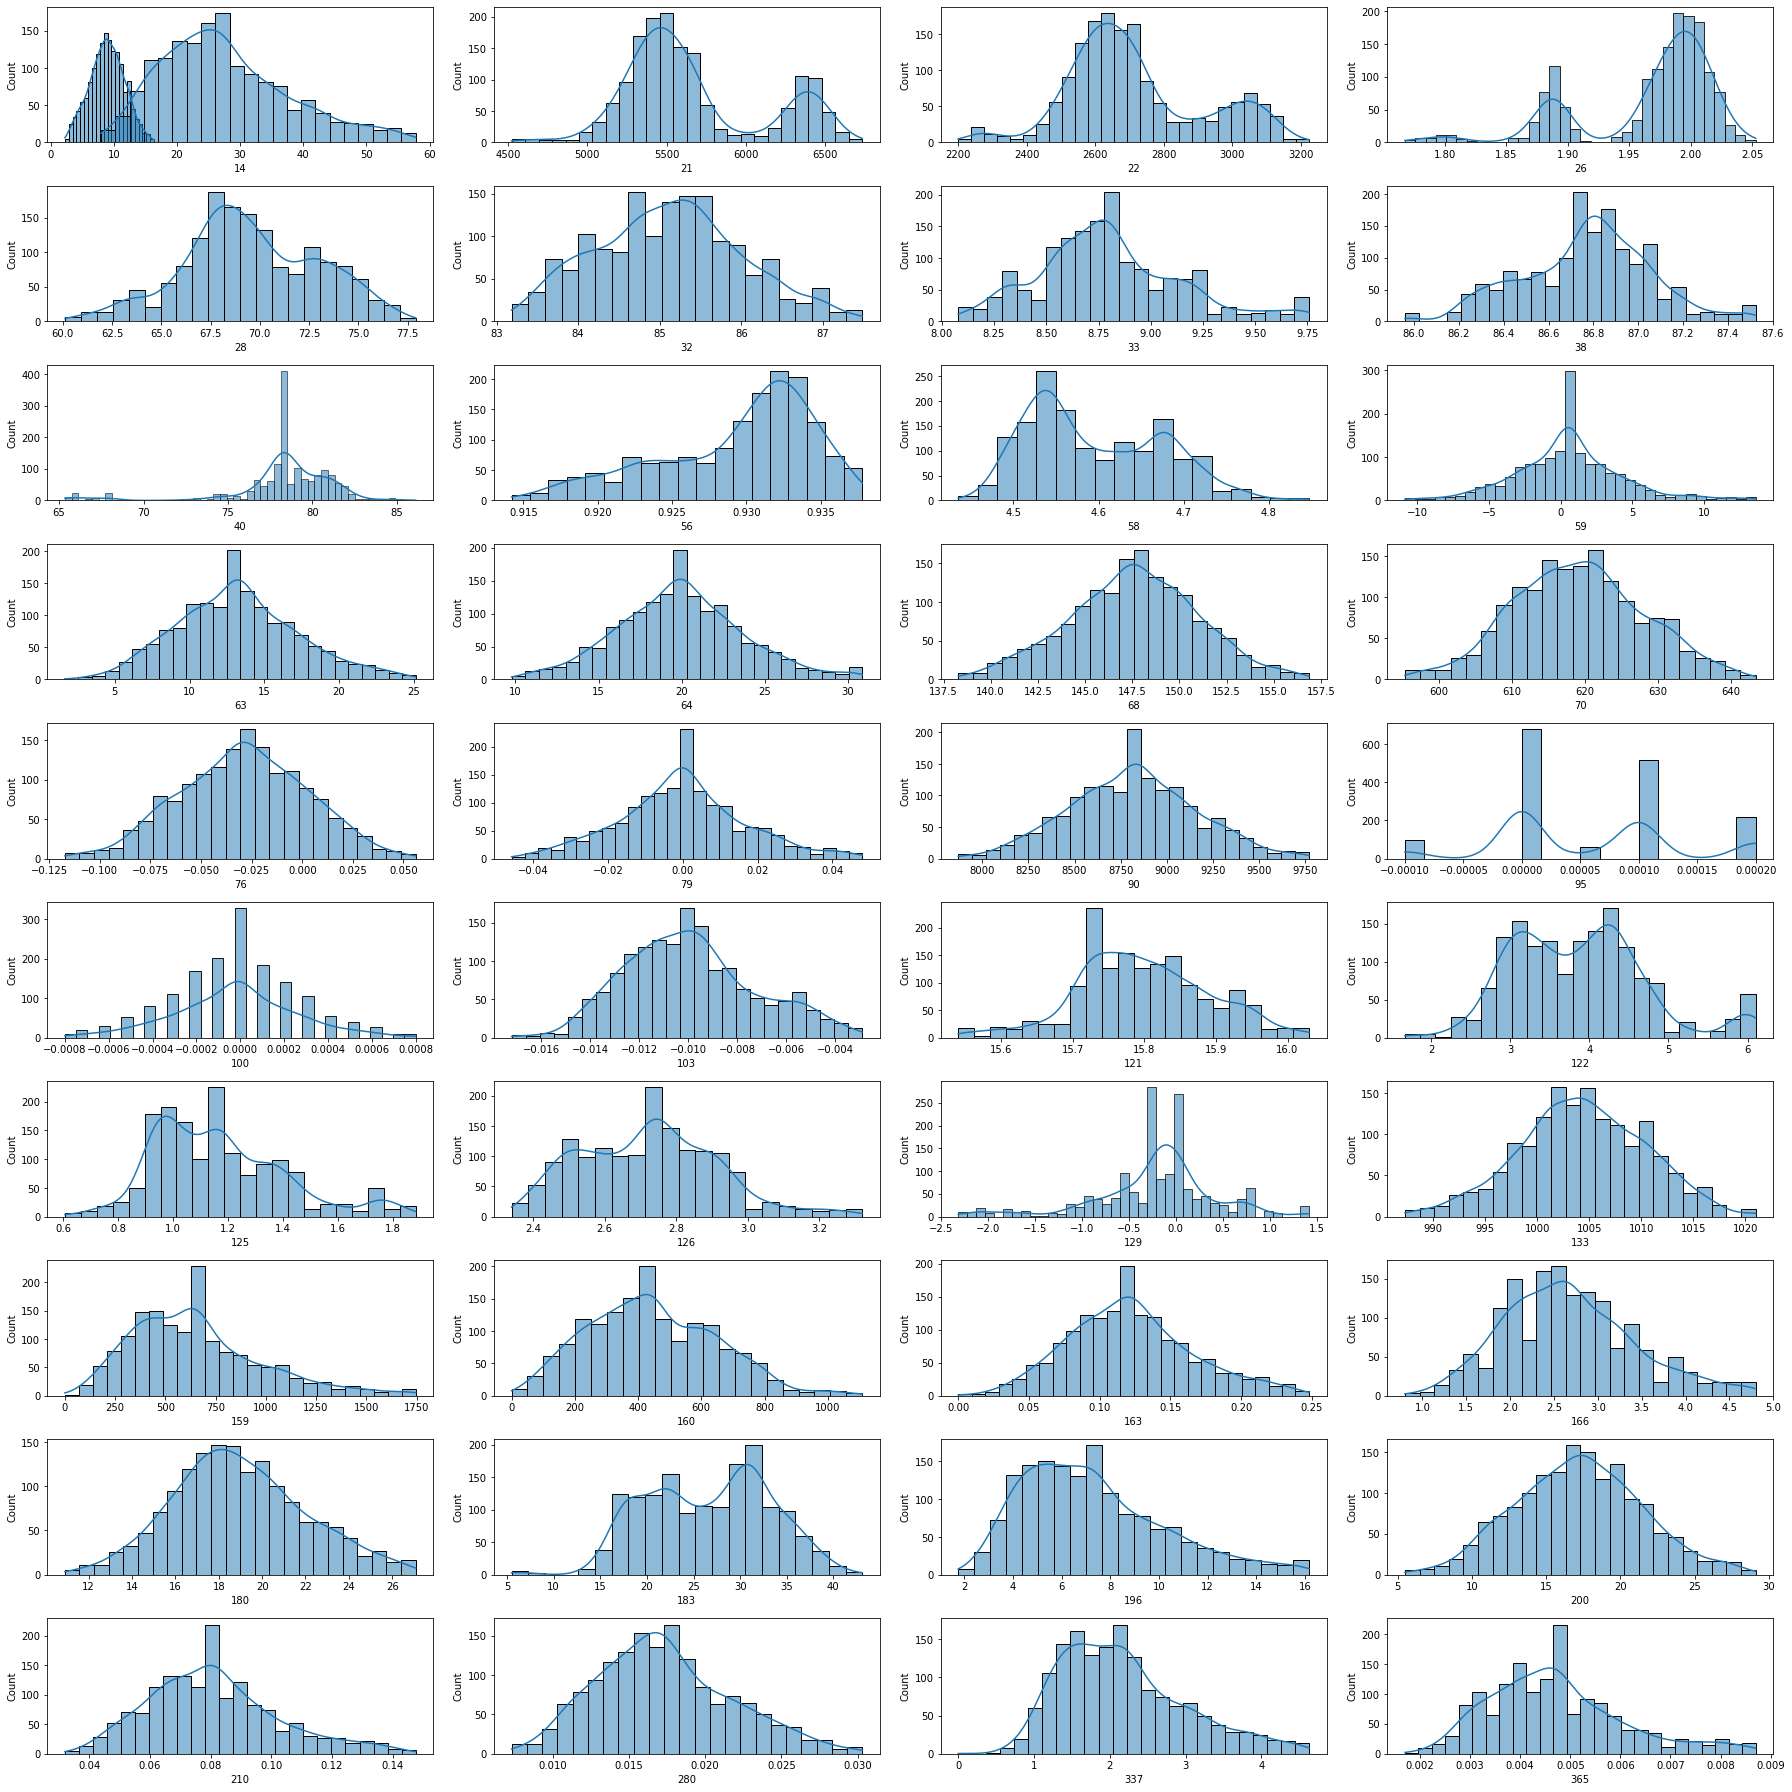

In [226]:
fig, ax = plt.subplots(10,4, figsize = (25,25))
ax = ax.flatten()
for i in range(0,41):
    sns.histplot(new_df.iloc[:,i], kde=True, ax=ax[i%40])
plt.tight_layout()
plt.show()
plt.close()


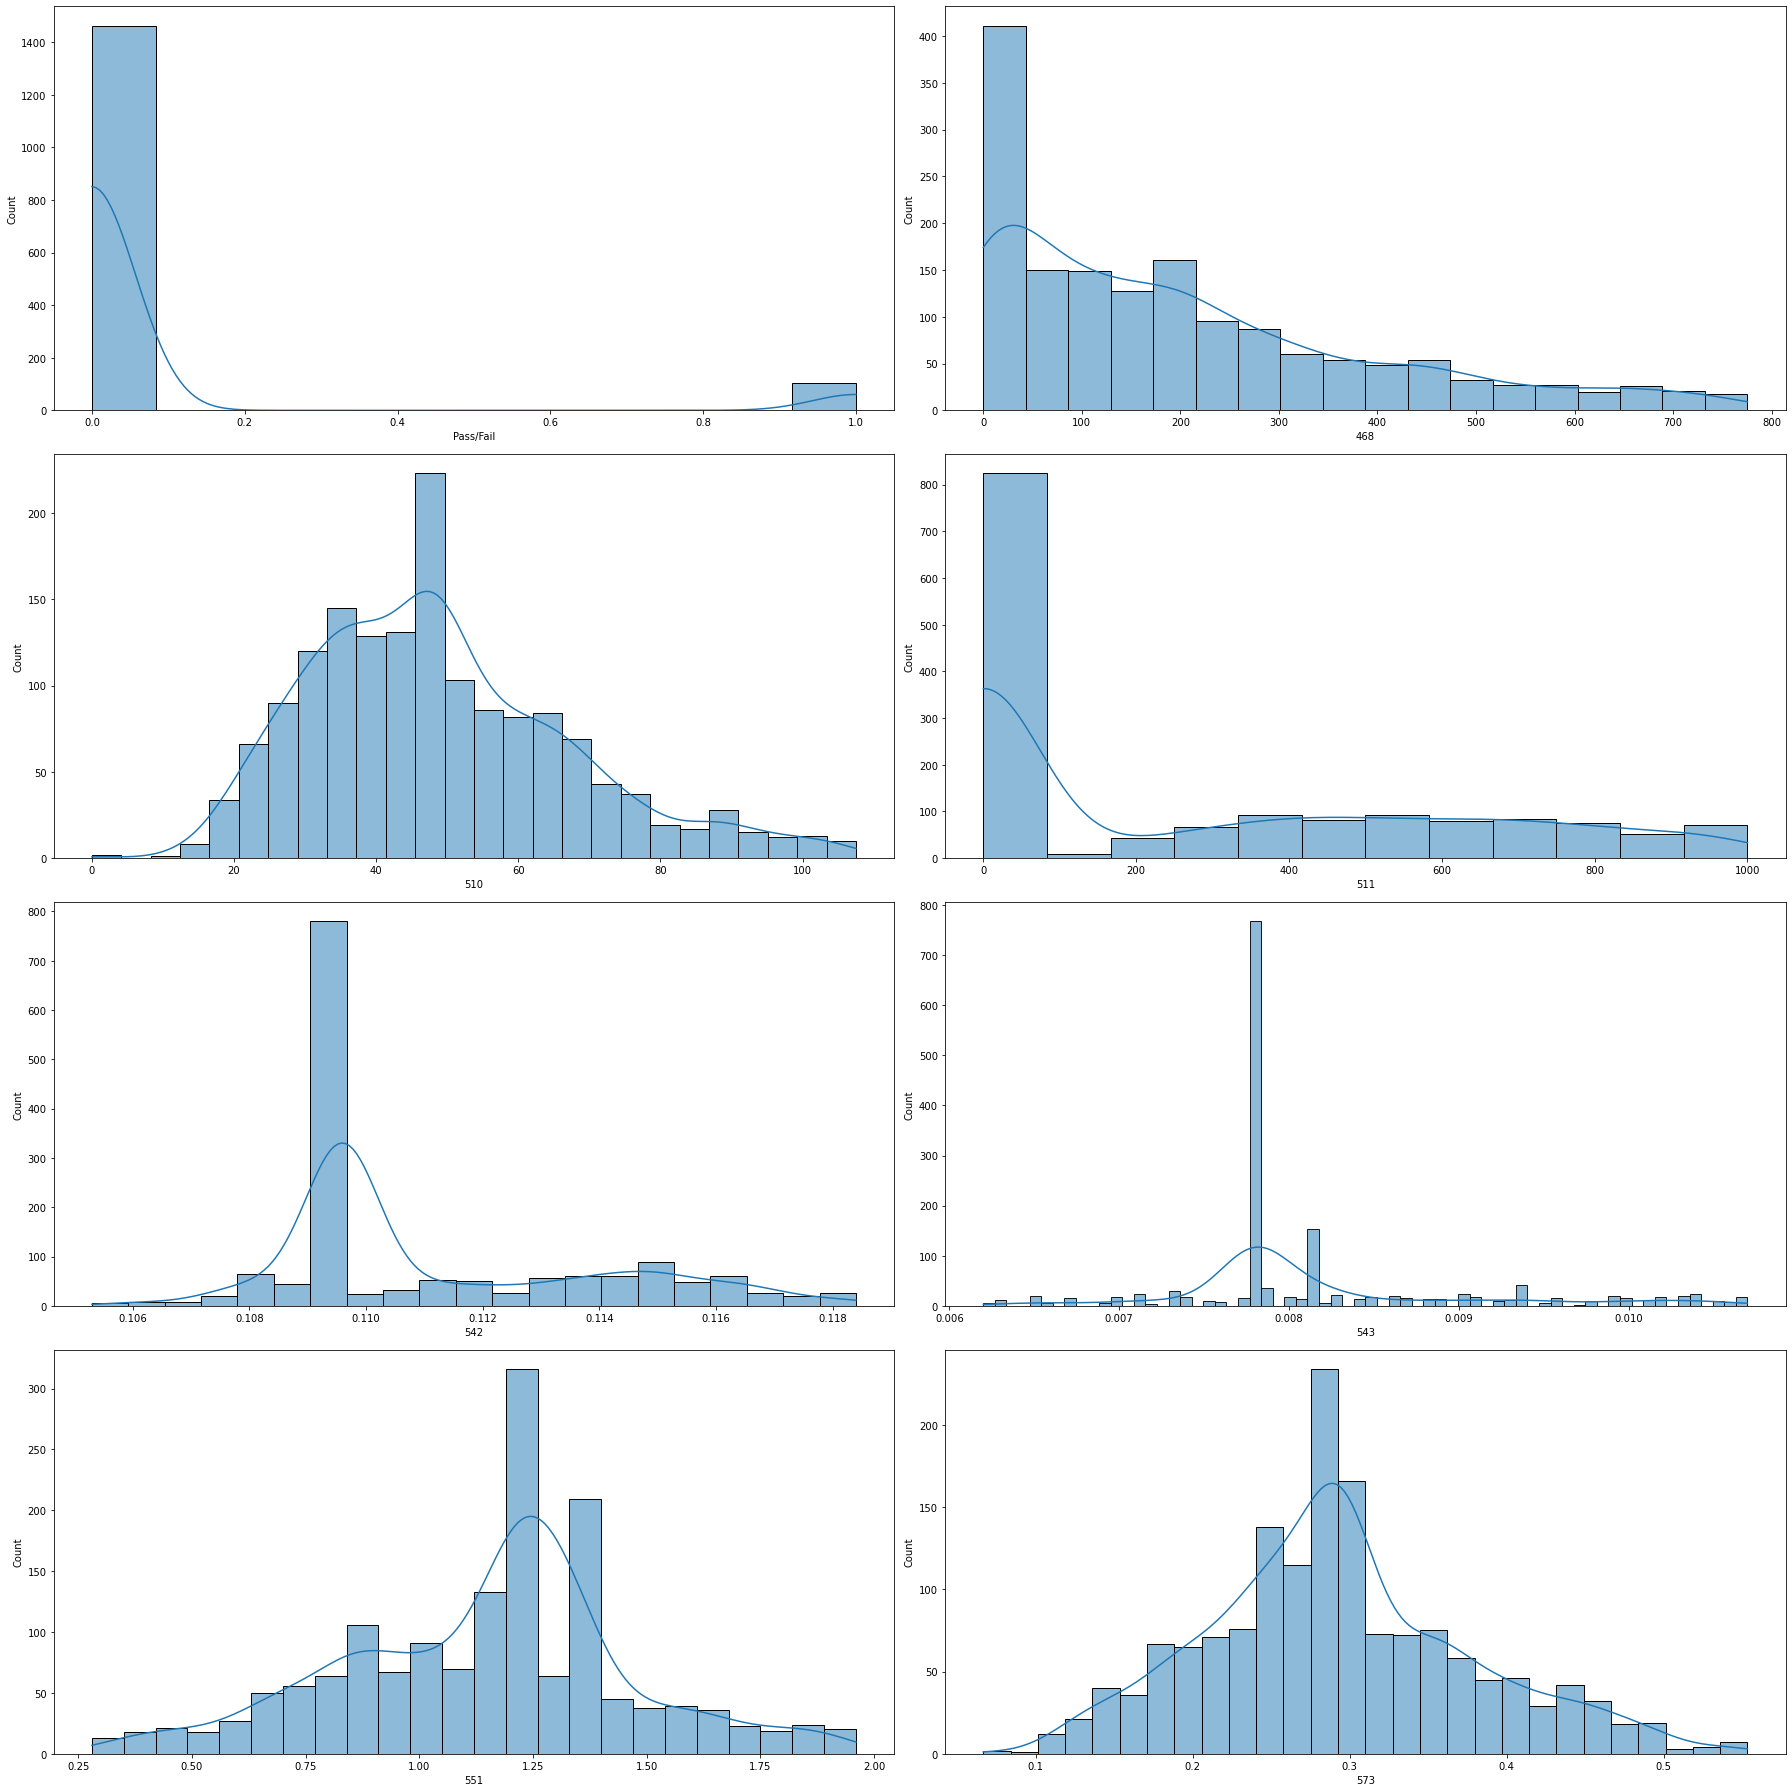

In [227]:
fig, ax = plt.subplots(4,2, figsize = (25,25))
ax = ax.flatten()
for i in range(41,49):
    sns.histplot(new_df.iloc[:,i], kde=True, ax=ax[i%8])
plt.tight_layout()
plt.show()
plt.close()


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

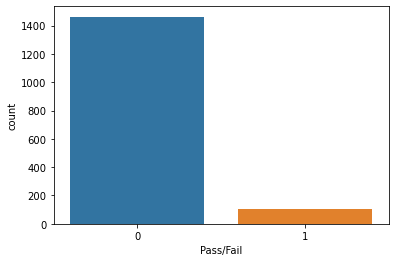

In [228]:
#Plotting TARGET variable distribution

sns.countplot(x='Pass/Fail', data= new_df )

In [229]:
# checking skewness of all the columns
print(new_df.skew())

14           0.007752
21           0.652814
22           0.464540
26          -1.300945
28          -0.012810
32           0.145193
33           0.562746
38          -0.089517
40          -2.182056
56          -0.787662
58           0.470114
59           0.331942
63           0.272288
64           0.205982
68          -0.053449
70           0.079493
76          -0.043151
79           0.167931
90           0.061109
95           0.236537
100          0.011984
103          0.352581
121          0.039776
122          0.568625
125          0.761949
126          0.367608
129         -0.672973
133         -0.050772
159          0.874076
160          0.348997
163          0.361821
166          0.472040
180          0.237454
183         -0.092693
196          0.801016
200          0.089105
210          0.569864
280          0.408780
337          0.730585
365          0.757140
460          0.673413
468          1.045237
510          0.721193
511          0.700040
542          0.877776
543       

#### 3.B:  Bivariate Analysis & Multivariate Analysis:

In [230]:
new_df.columns

Index(['14', '21', '22', '26', '28', '32', '33', '38', '40', '56', '58', '59',
       '63', '64', '68', '70', '76', '79', '90', '95', '100', '103', '121',
       '122', '125', '126', '129', '133', '159', '160', '163', '166', '180',
       '183', '196', '200', '210', '280', '337', '365', '460', '468', '510',
       '511', '542', '543', '551', '573', 'Pass/Fail'],
      dtype='object')

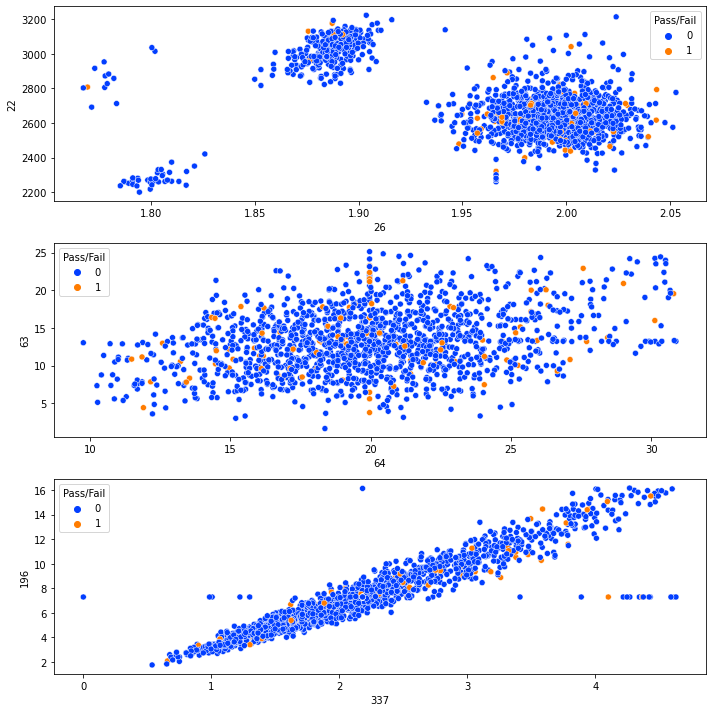

In [231]:
fig, ax =plt.subplots(3,1, figsize=(10,10))
ax = ax.flatten()
s1=sns.scatterplot(x=new_df['26'], y=new_df['22'], hue=new_df['Pass/Fail'], palette='bright', ax=ax[0])
s2=sns.scatterplot(x=new_df['64'], y=new_df['63'], hue=new_df['Pass/Fail'], palette='bright', ax=ax[1])
s3=sns.scatterplot(x=new_df['337'], y=new_df['196'], hue=new_df['Pass/Fail'], palette='bright', ax=ax[2])
plt.tight_layout()
plt.show()
plt.close()

<AxesSubplot:ylabel='22'>

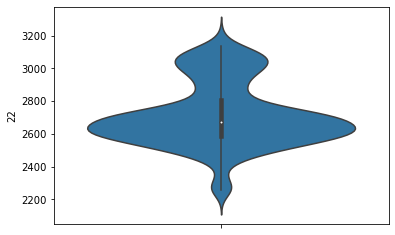

In [232]:
sns.violinplot(y='22', hue='Pass/Fail', data= new_df)

#### Multivariate analysis

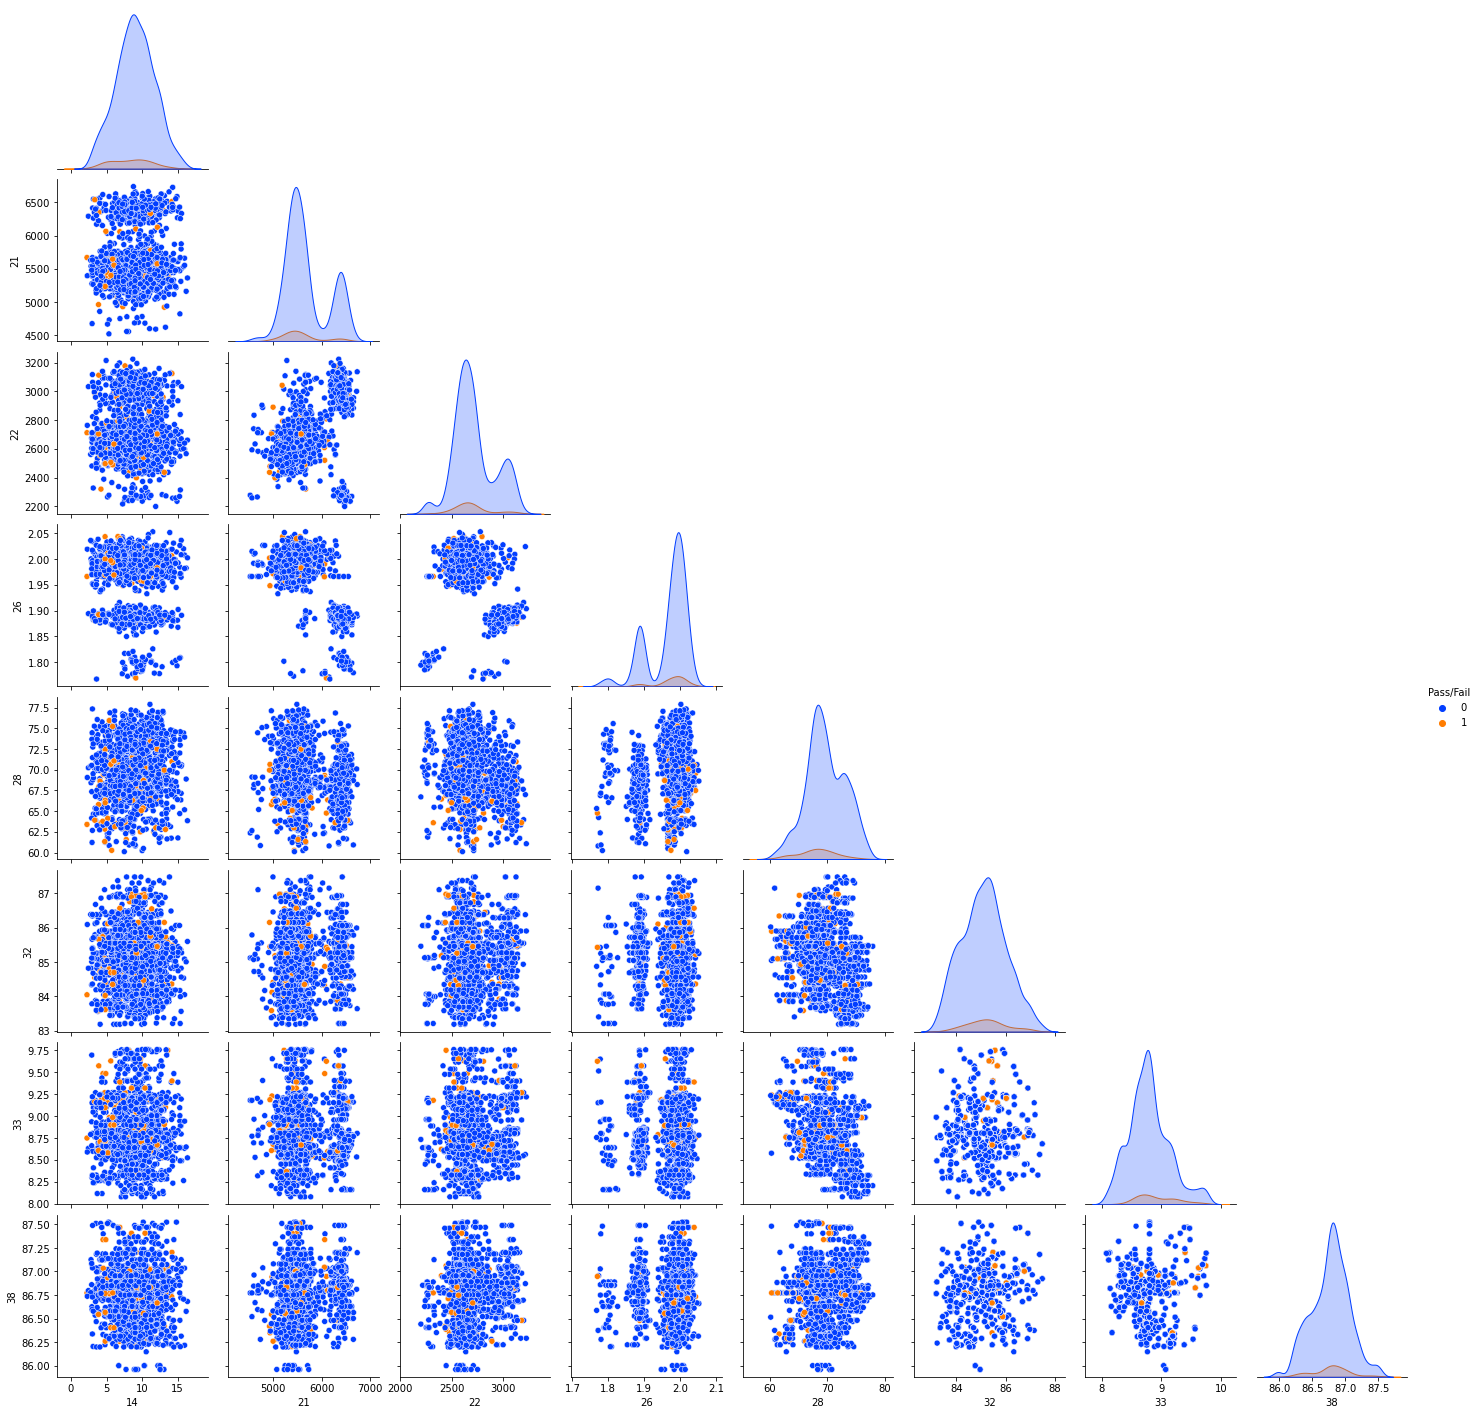

In [233]:
cols_to_plot1= new_df.columns[:8].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright', corner=True)

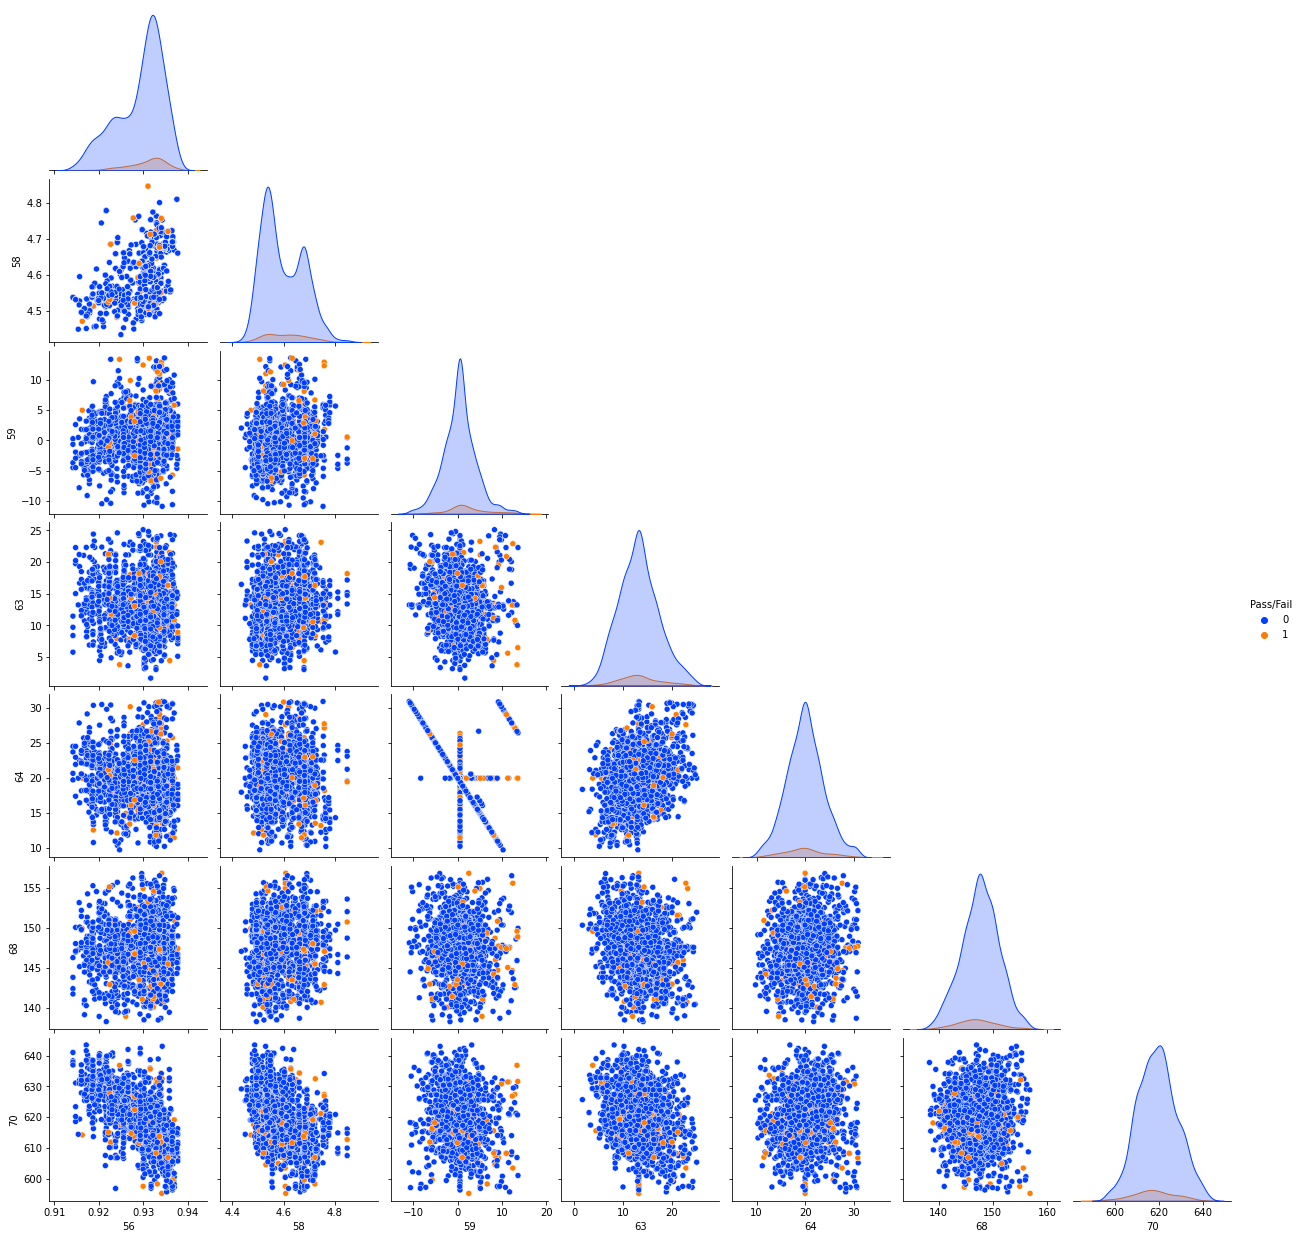

In [234]:
cols_to_plot1= new_df.columns[9:16].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright',corner=True)

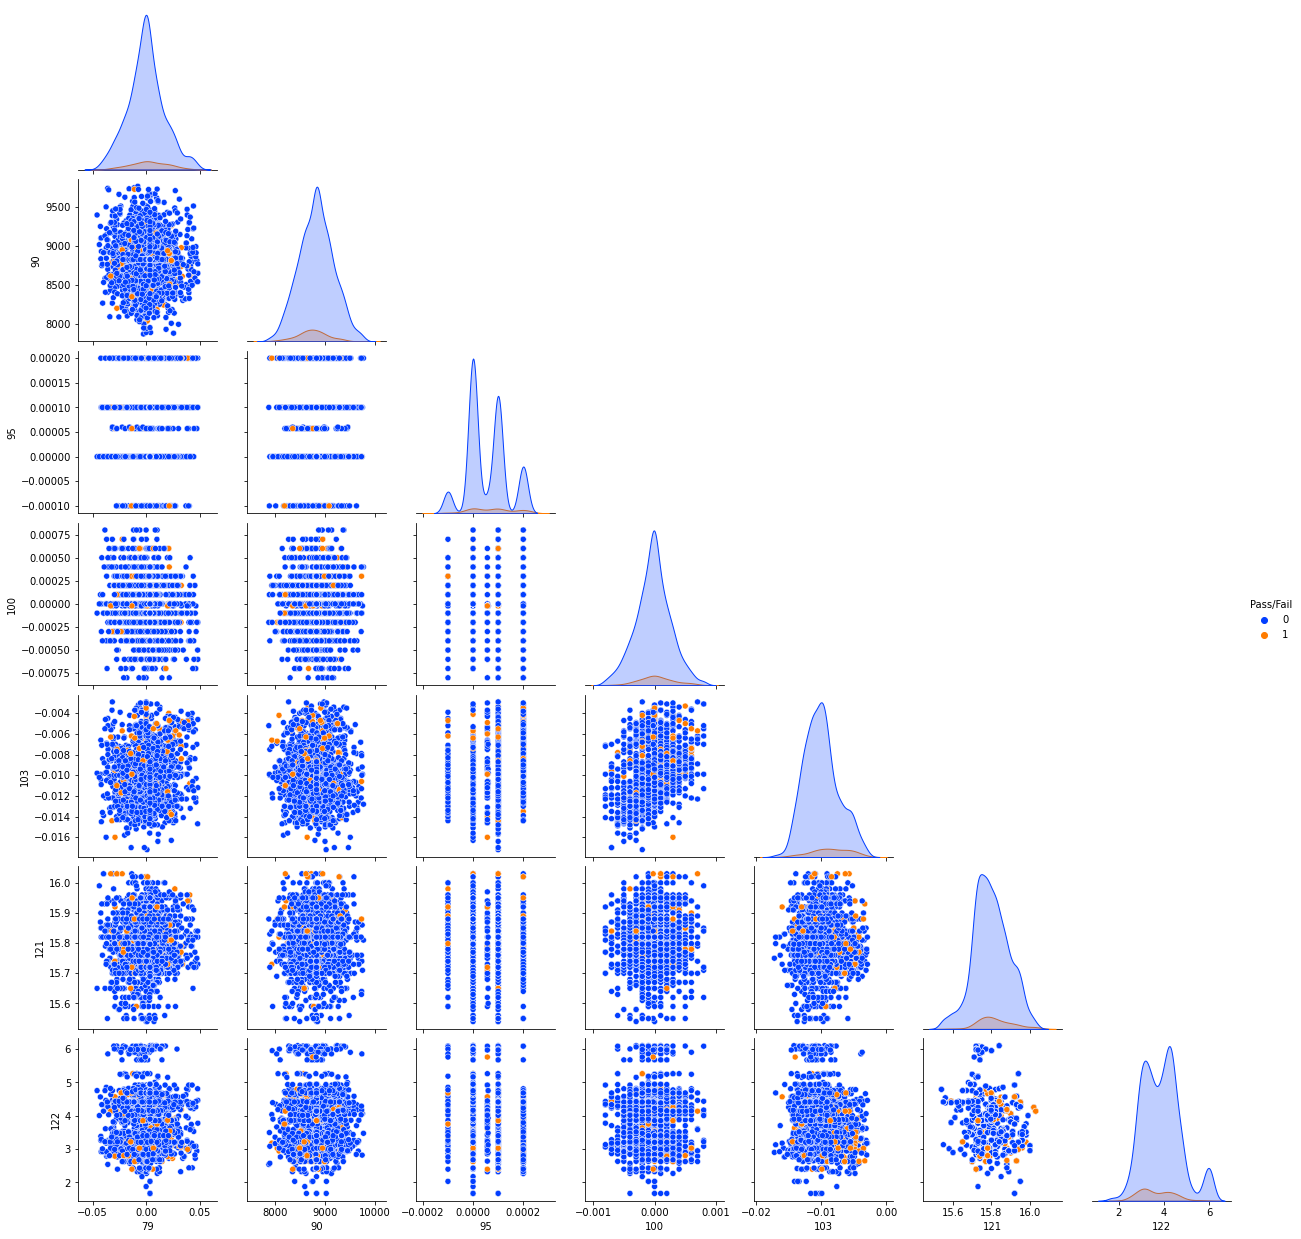

In [235]:
cols_to_plot1= new_df.columns[17:24].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright',corner=True)

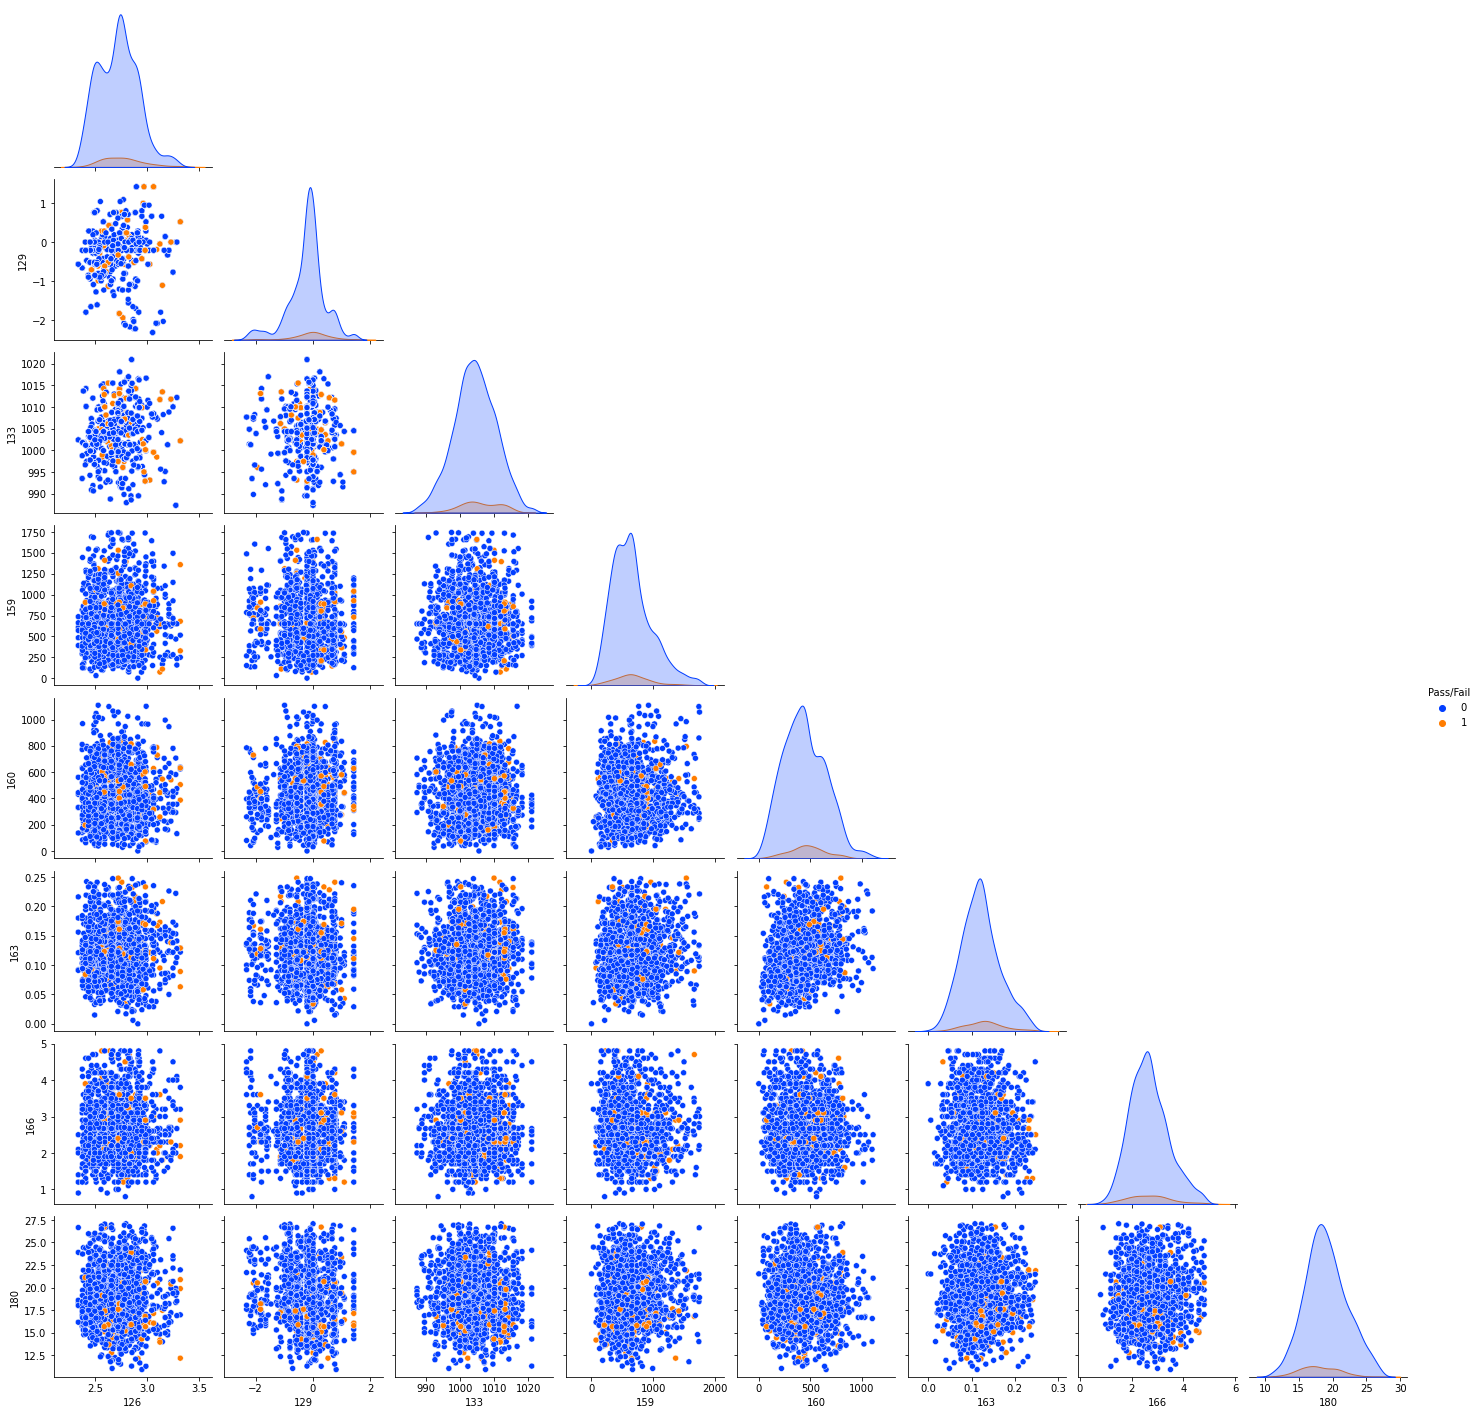

In [236]:
cols_to_plot1= new_df.columns[25:33].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright',corner=True)

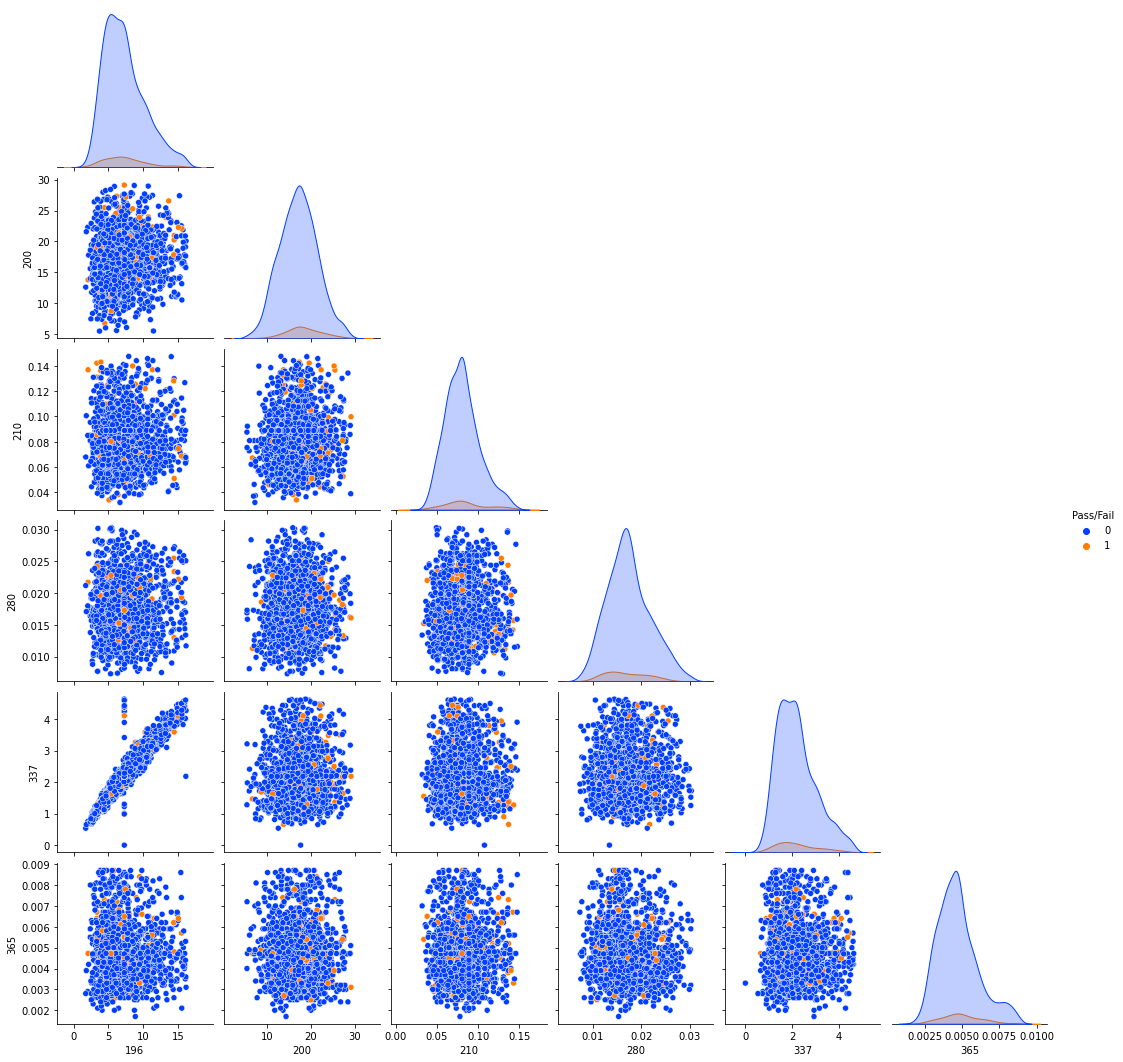

In [237]:
cols_to_plot1= new_df.columns[34:40].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright',corner=True)

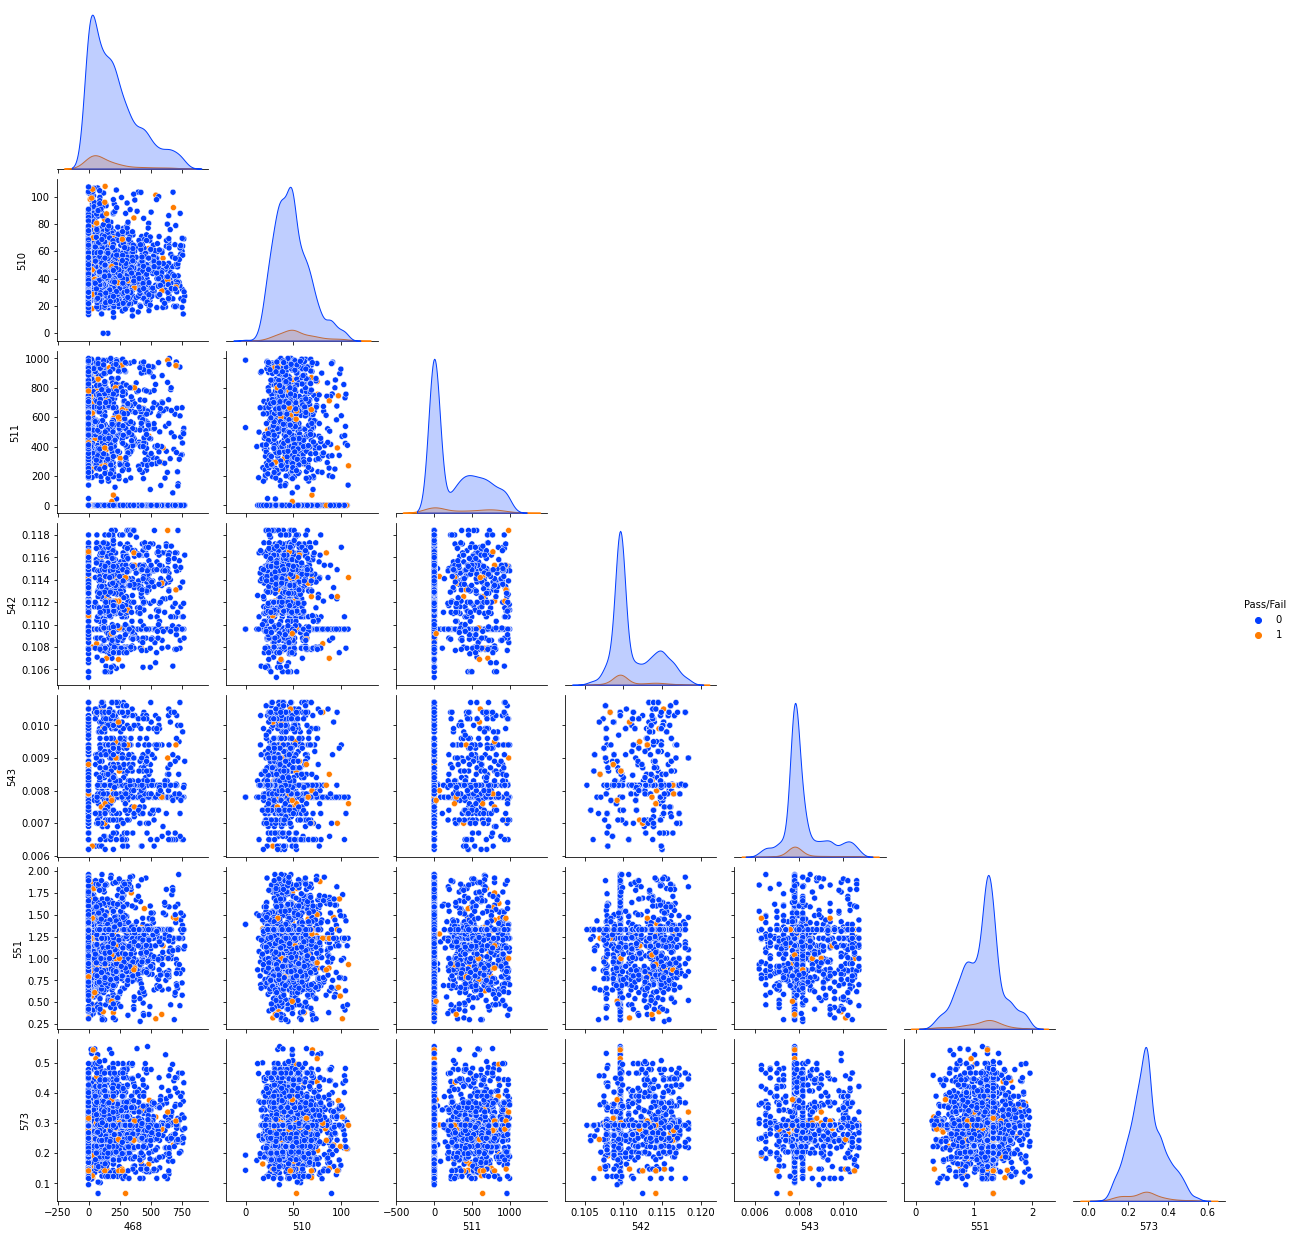

In [238]:
cols_to_plot1= new_df.columns[41:48].tolist() +['Pass/Fail']

sns.pairplot(new_df[cols_to_plot1], hue='Pass/Fail', palette='bright',corner=True)

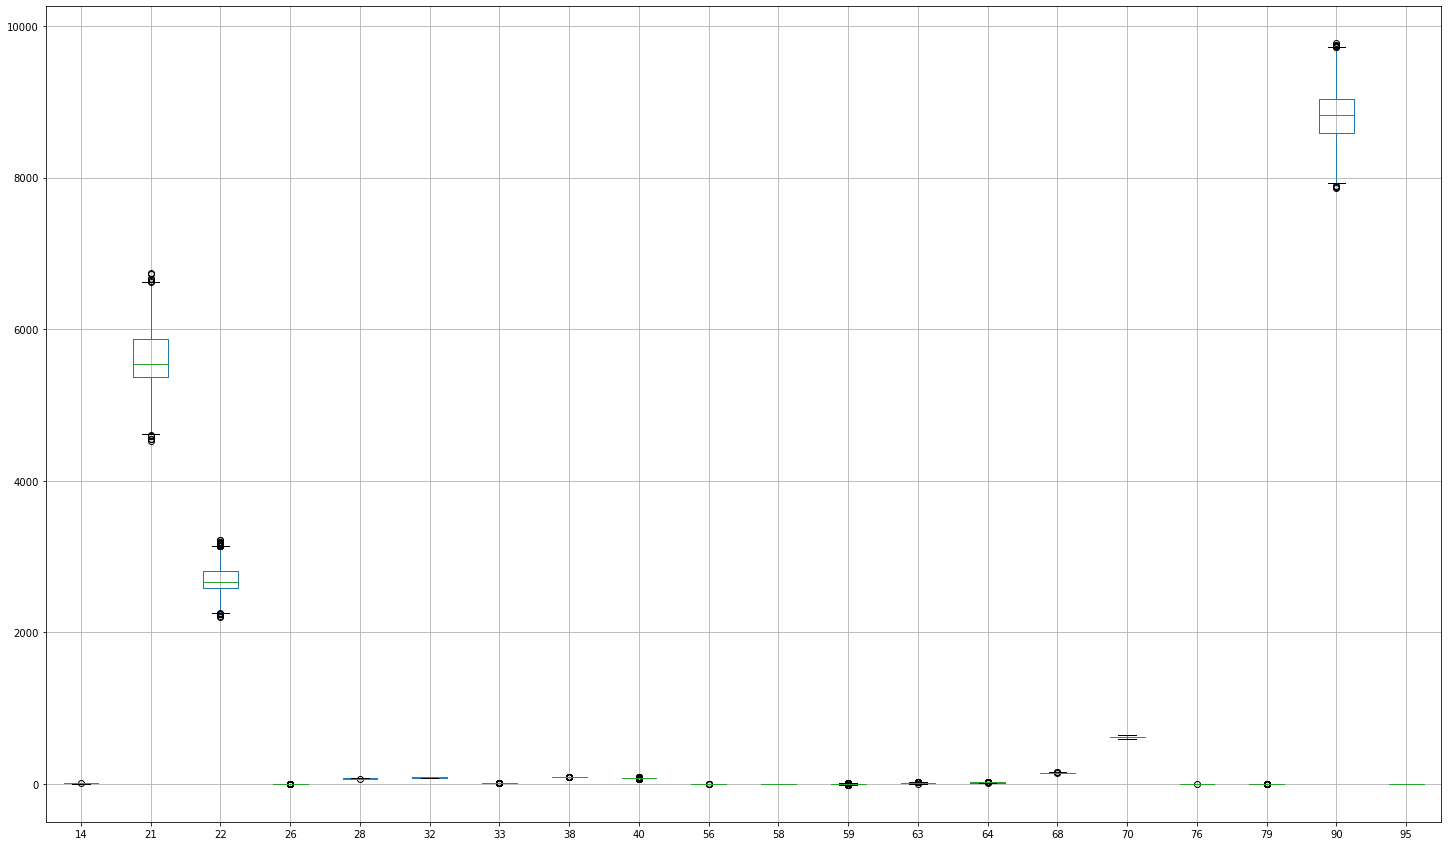

In [239]:
plt.figure(figsize=[25,15])
new_df.iloc[:,:20].boxplot()
plt.show()

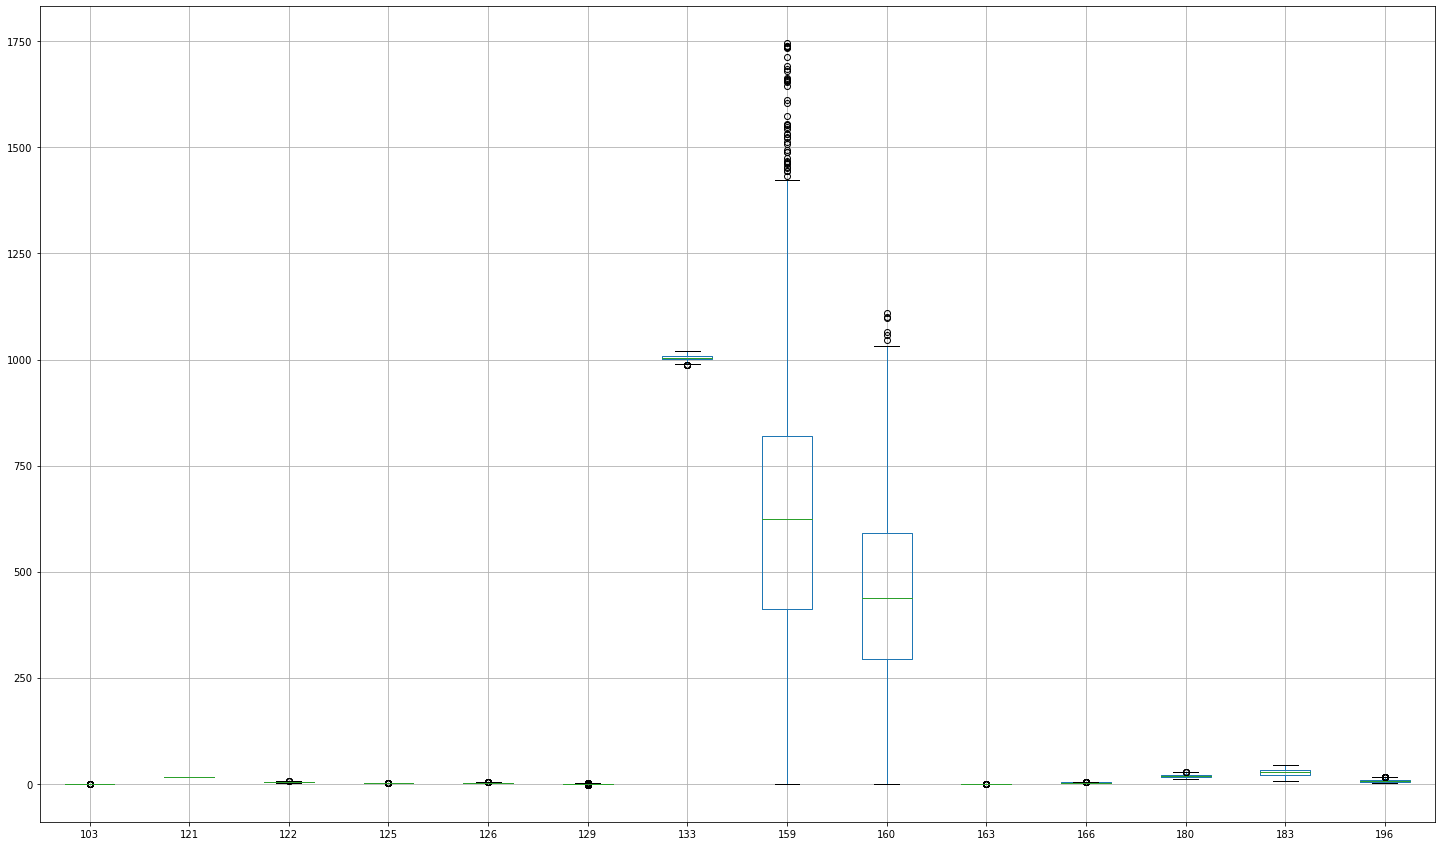

In [240]:
plt.figure(figsize=[25,15])
new_df.iloc[:,21:35].boxplot()
plt.show()

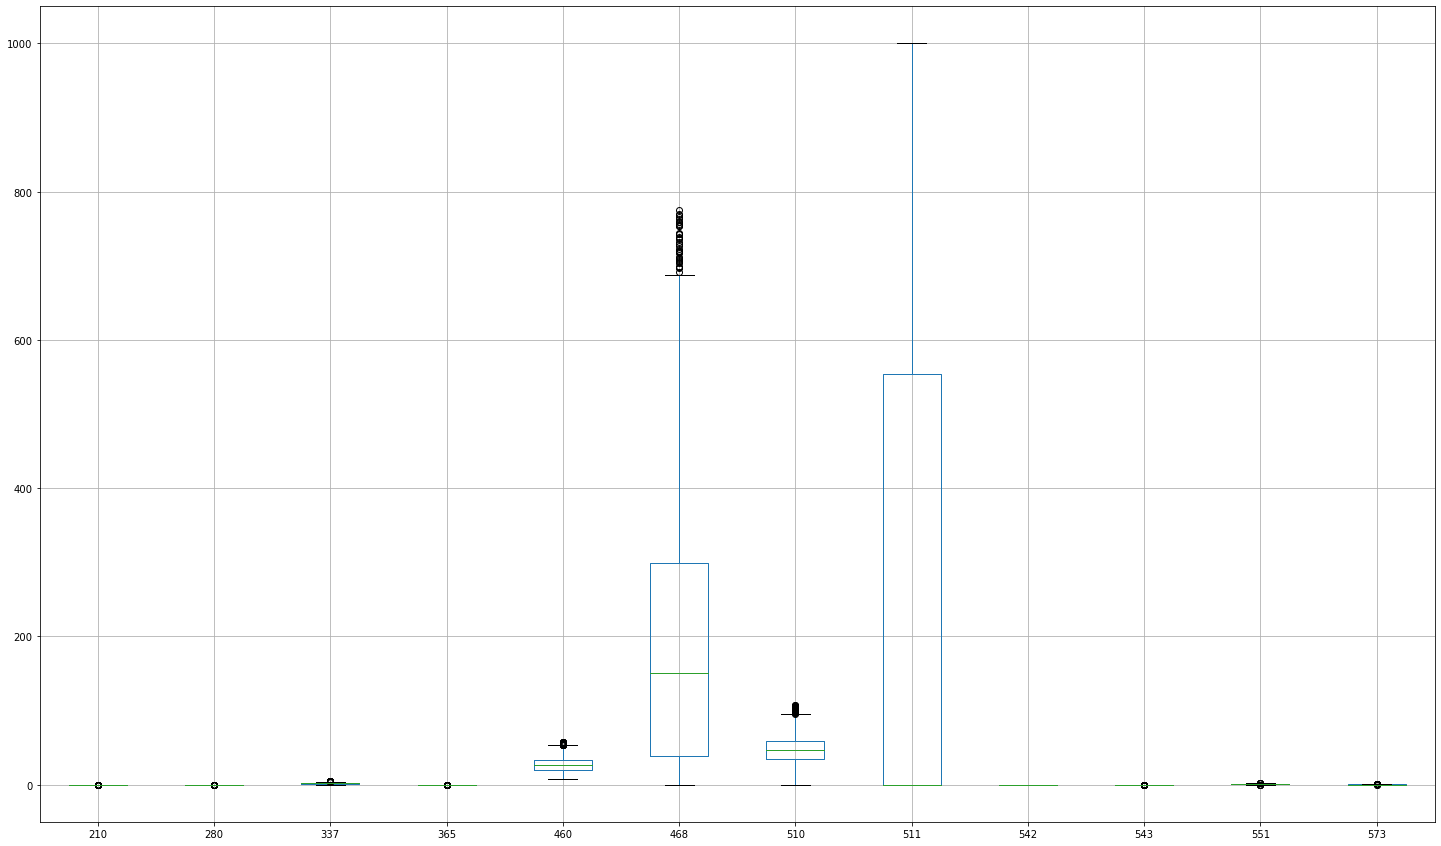

In [241]:
plt.figure(figsize=[25,15])
new_df.iloc[:,36:48].boxplot()
plt.show()

#### Inference: 

1. Univariate Analysis:
    
    * Target Column is highly unbalanced. 
    * Most of the columns have gaussian distribution with skewness +/- 0.5
    * Two peaks can be observed in some columns
    * Column '95' have four peaks
    
2. Bivariate & Multivariate Analysis:
    
    * Column '136' and '337' are linearly related. This observation can be seen only between these columns.
    * There are a lot of outliers present in columns 21,22,159,160,468(**even after outliers treatment**)
    * There is no co-relation between the columns. As all the data is spread throughout. 

### 4. Data Preprocessing

#### 4.A 

In [242]:
X= new_df.iloc[:, :48] # Predictors
y= new_df.iloc[:,48:] #Target Column

In [243]:
print(X.shape)
print("**********************")
print(y.shape)

(1567, 48)
**********************
(1567, 1)


#### 4.B Target Balancing

<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

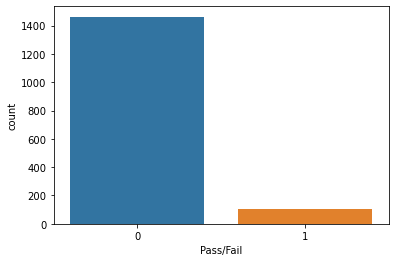

In [244]:
# Target variable distribution 
sns.countplot(x='Pass/Fail', data= new_df )

In [245]:
# Numerical values

y.value_counts(normalize=True)*100

Pass/Fail
0            93.363114
1             6.636886
dtype: float64

#### Inference:

#### 1. Fail percentage is 6.63% of total. 
#### 2. It is a imbalanced problem.

In [246]:
# Performing balancing technique

from imblearn.over_sampling import RandomOverSampler

os= RandomOverSampler(random_state=2)
x_bal, y_bal= os.fit_resample(X,y)


In [247]:
print("Predictor shape after balancing", x_bal.shape)
print("*******************************************")
print("Target shape after balancing", y_bal.shape)

Predictor shape after balancing (2926, 48)
*******************************************
Target shape after balancing (2926, 1)


<AxesSubplot:xlabel='Pass/Fail', ylabel='count'>

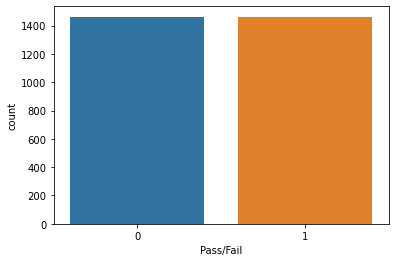

In [248]:
# Visualization after balancing 

sns.countplot(x='Pass/Fail', data= y_bal)

#### 4.C: Data Standardising and split

In [249]:
# Standardising data

X_scaled= x_bal.apply(zscore)
X_scaled.head()

14        21        22        26        28        32        33  \
0 -0.229694 -0.477084  1.125320 -3.866758 -1.367456 -2.068416  1.908159   
1  0.583916 -0.423814 -0.520312  0.857627 -0.130781 -0.313990 -0.171090   
2  0.347455 -0.409017 -0.006464  1.155226 -0.511299 -0.486513 -0.590482   
3  0.380569 -0.360483 -0.288421  0.652048 -1.751250 -0.307824 -0.532231   
4  0.736094 -0.341543 -0.356934  0.405355 -1.780773  1.339923 -0.272298   

         38        40        56  ...       337       365       460       468  \
0  0.629849  0.096463  0.356786  ... -0.707292 -0.071575  0.151237  0.738456   
1  2.627885  0.080431  0.503552  ... -1.236174  0.358808  1.198915  1.571329   
2 -0.014125  0.096463 -0.136466  ... -0.767224  0.433167  0.392516 -0.855739   
3 -0.314703 -0.295249 -0.136466  ... -0.550622 -0.161704 -0.073790 -0.839710   
4 -2.211888 -0.437173 -0.041579  ... -0.680512  1.102396  0.246253 -0.726492   

        510       511       542       543       551       573  
0  0.666865 -0.899512 -0.538936 -0.391365 -1.083538  0.330467  
1 -0.153988 -0.899512 -0.538936 -0.391365  0.595602 -0.235798  
2 -0.153988 -0.182110 -0.538936 -0.391365 -0.869830 -1.102049  
3 -0.153988 -0.899512 -0.538936 -0.391365  0.030861 -1.263839  
4 -0.153988 -0.899512 -0.538936 -0.391365  0.030861 -0.717797  

[5 rows x 48 columns]

In [250]:
# splitting data into train and test sets

x_train, x_test, y_train, y_test = train_test_split(X_scaled, y_bal, test_size=0.25,random_state=4)

In [251]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2194, 48)
(732, 48)
(2194, 1)
(732, 1)


#### 4.D Train & Test statistical 

In [252]:
x_train.describe().T

count      mean       std       min       25%       50%       75%  \
14   2194.0  0.002059  0.998603 -2.341048 -0.732678  0.025156  0.732172   
21   2194.0 -0.015170  0.985506 -2.603718 -0.652281 -0.291233  0.221190   
22   2194.0 -0.019630  0.987673 -2.562529 -0.602989 -0.236378  0.288011   
26   2194.0  0.009351  0.997191 -3.974442 -0.084335  0.342702  0.626596   
28   2194.0  0.013191  1.019697 -2.545085 -0.593283 -0.038936  0.689299   
32   2194.0 -0.004075  1.009339 -2.317602 -0.692888 -0.064455  0.614468   
33   2194.0  0.004229  1.010118 -2.289125 -0.701422 -0.171090  0.699819   
38   2194.0  0.001557  1.009411 -2.870404 -0.666099 -0.014125  0.608414   
40   2194.0  0.009035  0.989390 -3.512182 -0.036447  0.096463  0.528464   
56   2194.0 -0.003234  1.009371 -3.312362 -0.607676  0.314853  0.713217   
58   2194.0 -0.004793  0.985542 -2.179970 -0.849103 -0.100812  0.835034   
59   2194.0 -0.030124  0.997276 -2.964845 -0.544148 -0.190561  0.435467   
63   2194.0  0.008015  1.004828 -2.844819 -0.669728 -0.011238  0.663376   
64   2194.0  0.014395  0.986912 -2.487562 -0.669151 -0.002949  0.626007   
68   2194.0 -0.000689  1.003019 -2.552127 -0.673932  0.017670  0.656707   
70   2194.0  0.009443  1.004270 -2.594706 -0.652974 -0.033529  0.701889   
76   2194.0  0.014483  0.998847 -2.811954 -0.633081 -0.026389  0.634938   
79   2194.0 -0.032344  1.001071 -2.773700 -0.713091 -0.070639  0.607357   
90   2194.0  0.005861  0.992883 -2.789171 -0.646814  0.023575  0.606643   
95   2194.0  0.010010  0.989006 -1.984275 -0.788226  0.407823  0.407823   
100  2194.0  0.019698  0.984406 -2.814707 -0.713149 -0.012630  0.687890   
103  2194.0 -0.005760  1.002093 -2.820086 -0.690846 -0.087561  0.719776   
121  2194.0 -0.004948  1.013858 -2.942898 -0.664650 -0.139051  0.637206   
122  2194.0 -0.012711  0.993531 -2.629528 -0.823035 -0.151512  0.640444   
125  2194.0 -0.011356  0.993379 -2.222150 -0.717740 -0.164784  0.584491   
126  2194.0  0.003859  0.995323 -2.071368 -0.779270 -0.054061  0.660934   
129  2194.0 -0.007161  0.996764 -3.334058 -0.422134  0.087822  0.451966   
133  2194.0  0.012859  1.002098 -3.019952 -0.623797 -0.038928  0.816357   
159  2194.0  0.013619  1.015118 -1.956999 -0.700709 -0.035165  0.567988   
160  2194.0 -0.017009  0.994913 -2.270805 -0.691700 -0.057901  0.626879   
163  2194.0  0.003631  0.992480 -2.717681 -0.705165 -0.100977  0.561136   
166  2194.0 -0.004311  1.001486 -2.444527 -0.754040 -0.013886  0.546334   
180  2194.0 -0.004574  1.003013 -2.529343 -0.709516 -0.105710  0.683106   
183  2194.0 -0.014033  0.997480 -3.300529 -0.854454  0.161528  0.733596   
196  2194.0  0.003240  1.005279 -1.799299 -0.769090 -0.142044  0.585364   
200  2194.0 -0.023263  1.011407 -2.956247 -0.699120 -0.070007  0.628742   
210  2194.0 -0.011574  1.002695 -2.108059 -0.697926 -0.092434  0.457314   
280  2194.0 -0.000355  1.003242 -2.289720 -0.745581 -0.090492  0.704974   
337  2194.0 -0.002952  0.998271 -2.593595 -0.773358 -0.166318  0.605858   
365  2194.0 -0.012172  0.986345 -2.095033 -0.682215 -0.087345  0.507526   
460  2194.0  0.002946  0.995062 -2.040808 -0.661353 -0.140949  0.542537   
468  2194.0  0.019284  1.010042 -0.973074 -0.788259 -0.308833  0.440448   
510  2194.0 -0.001769  1.006742 -2.678384 -0.749003 -0.153988  0.598440   
511  2194.0  0.013906  1.001555 -0.899512 -0.899512 -0.273617  0.987200   
542  2194.0  0.033885  1.020772 -2.030411 -0.538936 -0.538936  0.834791   
543  2194.0  0.014552  1.016357 -2.347196 -0.391365 -0.391365  0.055355   
551  2194.0  0.009416  1.003384 -2.610030 -0.656121  0.292476  0.595602   
573  2194.0 -0.014688  0.983990 -2.467152 -0.650385  0.056323  0.464450   

          max  
14   2.732158  
21   2.640953  
22   2.744601  
26   1.611414  
28   2.667317  
32   2.682412  
33   2.623855  
38   2.627885  
40   2.270505  
56   1.635746  
58   3.119089  
59   2.981716  
63   2.899937  
64   2.656516  
68   2.726804  
70   2.784491  
76   2.840721  
79   2.780471  
90   3.022798  
95   1.603

In [253]:
x_test.describe().T

count      mean       std       min       25%       50%       75%  \
14   732.0 -0.006173  1.005516 -2.341048 -0.765626  0.033851  0.703386   
21   732.0  0.045468  1.042262 -2.366373 -0.632897 -0.257495  0.363389   
22   732.0  0.058836  1.035191 -2.653441 -0.556215 -0.137561  0.524842   
26   732.0 -0.028028  1.009216 -3.935285 -0.225086  0.303544  0.640301   
28   732.0 -0.039536  0.938776 -2.584438 -0.583452 -0.045490  0.493291   
32   732.0  0.012214  0.972750 -2.317602 -0.597611 -0.064455  0.567120   
33   732.0 -0.012677  0.970312 -2.179648 -0.672736 -0.171090  0.602417   
38   732.0 -0.004666  0.972612 -2.870404 -0.681560  0.015609  0.628092   
40   732.0 -0.027081  1.032026 -3.512182 -0.195068  0.096463  0.513158   
56   732.0  0.009694  0.972688 -2.997863 -0.607676  0.293886  0.760392   
58   732.0  0.014366  1.043350 -1.897353 -0.845570 -0.143129  0.835034   
59   732.0  0.090288  1.004077 -2.817286 -0.339518 -0.190561  0.506227   
63   732.0 -0.024022  0.986372 -2.368806 -0.706007 -0.060067  0.601222   
64   732.0 -0.043145  1.038395 -2.369475 -0.779806 -0.002949  0.604794   
68   732.0  0.002065  0.992264 -2.610043 -0.647370  0.017799  0.640327   
70   732.0 -0.028302  0.987923 -2.594706 -0.651811  0.010904  0.666172   
76   732.0 -0.043408  1.003562 -2.710839 -0.735827 -0.049221  0.514252   
79   732.0  0.096945  0.991844 -2.382895 -0.536932 -0.061749  0.814602   
90   732.0 -0.017568  1.022189 -2.727491 -0.619361 -0.008519  0.606643   
95   732.0 -0.030001  1.033024 -1.984275 -0.788226 -0.070290  0.407823   
100  732.0 -0.059041  1.044470 -2.814707 -0.713149 -0.012630  0.687890   
103  732.0  0.017266  0.994869 -2.749112 -0.655359 -0.016586  0.666545   
121  732.0  0.014830  0.958499 -2.834410 -0.664650 -0.139051  0.637206   
122  732.0  0.038099  1.019551 -2.629528 -0.745479 -0.006488  0.727459   
125  732.0  0.034037  1.020188 -2.222150 -0.677974 -0.068508  0.605421   
126  732.0 -0.011567  1.015163 -2.071368 -0.799699 -0.059168  0.577943   
129  732.0  0.021464  1.010697 -3.334058 -0.422134  0.160651  0.543003   
133  732.0 -0.038541  0.994058 -3.019952 -0.711512 -0.128002  0.806594   
159  732.0 -0.040821  0.953477 -2.053159 -0.700709 -0.035165  0.555580   
160  732.0  0.050981  1.014747 -2.419677 -0.693029 -0.055789  0.762458   
163  732.0 -0.010882  1.023487 -2.853356 -0.773003 -0.094627  0.538524   
166  732.0  0.012923  0.996789 -2.314489 -0.754040 -0.013886  0.546334   
180  732.0  0.013710  0.992161 -2.569709 -0.638876 -0.067026  0.690674   
183  732.0  0.042060  1.007709 -3.396809 -0.798629  0.323192  0.776353   
196  732.0 -0.009712  0.985318 -1.912527 -0.769948 -0.116310  0.585364   
200  732.0  0.069725  0.963021 -2.656097 -0.492617 -0.024384  0.756005   
210  732.0  0.034690  0.992441 -2.025836 -0.621869 -0.092434  0.561121   
280  732.0  0.001063  0.991591 -2.102552 -0.745581 -0.113888  0.681578   
337  732.0  0.008848  1.006479 -1.959715 -0.770527 -0.146380  0.652134   
365  732.0  0.036482  1.040352 -2.318109 -0.682215 -0.071575  0.581885   
460  732.0 -0.008830  1.015966 -1.987897 -0.725020 -0.132724  0.620572   
468  732.0 -0.057799  0.968358 -0.973074 -0.804890 -0.396108  0.337455   
510  732.0  0.005303  0.980873 -2.023970 -0.735904 -0.153988  0.609623   
511  732.0 -0.041680  0.995529 -0.899512 -0.899512 -0.899512  0.955730   
542  732.0 -0.101563  0.928995 -2.226658 -0.538936 -0.538936  0.442297   
543  732.0 -0.043615  0.949341 -2.347196 -0.391365 -0.391365  0.055355   
551  732.0 -0.028223  0.990624 -2.548970 -0.717180  0.244509  0.595602   
573  732.0  0.044023  1.046633 -2.467152 -0.647576  0.071037  0.638318   

          max  
14   2.881635  
21   2.453327  
22   2.499535  
26   1.582046  
28   2.437690  
32   2.682412  
33   2.623855  
38   2.580095  
40   1.953265  
56   1.635746  
58   3.119089  
59   2.971097  
63   2.829630  
64   2.636364  
68   2.726804  
70   2.662887  
76   2.765700  
79   2.780471  
90   2.941547  
95   1.603872  
100  2.789448  
103  2.254603  
121  2.373

#### Conclusion:

    1. There is low skewness of train and test data after standardising with zscore.
    2. No missing values are present.
    3. In train and test data, Mean of data is zero or approximately equal to zero and Standard deviation is equal to zero.
    4. Data follows gaussian distribution as does original data. 

### 5. Model Training, Testing and Tuning

#### 5.A : Supervised Model 

In [356]:
# Logistic regression 
from sklearn.linear_model import LogisticRegression

lr= LogisticRegression()

lr.fit(x_train, y_train)

log_a=lr.score(x_train, y_train)
log_b=lr.score(x_test, y_test)

print("Training Score for logistic model : ",log_a, "\n")
print("Testing score for logistic model : ",log_b )

Training Score for logistic model :  0.7470373746581586 

Testing score for logistic model :  0.73224043715847


In [311]:
x_train.shape

(2194, 48)

In [312]:
y_train.shape

(2194, 1)

In [313]:

y_pred = lr.predict(x_test)

# print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.69      0.71       357
           1       0.72      0.78      0.75       375

    accuracy                           0.73       732
   macro avg       0.73      0.73      0.73       732
weighted avg       0.73      0.73      0.73       732



<AxesSubplot:>

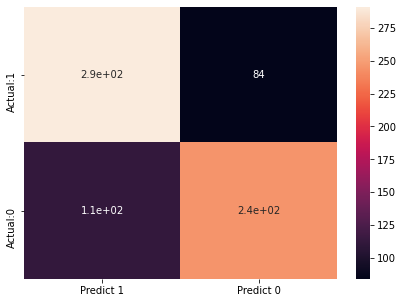

In [314]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ['Actual:1','Actual:0']],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

#### 5.B 

#### Cross Validation Techniques

In [315]:
# KFold technique

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=50, random_state=4, shuffle=True)

lr = LogisticRegression()

results = cross_val_score(lr, X_scaled, y_bal, cv=kfold)

print(results)
print("****************************************************")
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.76271186 0.69491525 0.72881356 0.62711864 0.79661017 0.72881356
 0.83050847 0.72881356 0.77966102 0.76271186 0.81355932 0.6779661
 0.69491525 0.74576271 0.74576271 0.71186441 0.76271186 0.72881356
 0.61016949 0.74576271 0.77966102 0.86440678 0.72881356 0.79661017
 0.66101695 0.74576271 0.77586207 0.82758621 0.68965517 0.79310345
 0.72413793 0.70689655 0.67241379 0.72413793 0.81034483 0.75862069
 0.70689655 0.81034483 0.72413793 0.77586207 0.62068966 0.75862069
 0.81034483 0.77586207 0.65517241 0.67241379 0.75862069 0.72413793
 0.77586207 0.75862069]
****************************************************
Accuracy: 74.129% (5.542%)


In [316]:
#StratifiedKFold 

In [317]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10,random_state=4,shuffle=True)

lr= LogisticRegression()

score=cross_val_score(lr,X_scaled,y_bal,cv=skf)

print(" ")
print("Cross Validation Scores are {}".format(score))

print("****************************************\n")
print("Average Cross Validation score is :{}".format(score.mean()))

 
Cross Validation Scores are [0.68600683 0.75767918 0.76791809 0.74061433 0.72354949 0.71331058
 0.78424658 0.71917808 0.73630137 0.71917808]
****************************************

Average Cross Validation score is :0.7347982607882556


In [318]:
#LOOCV 

from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score

cv = LeaveOneOut()

scores = cross_val_score(lr, X_scaled, y_bal, scoring='accuracy', cv=cv, n_jobs=-1)

print("Accuracy: %.3f%% (%.3f%%)" % (scores.mean()*100.0, scores.std()))

Accuracy: 74.573% (0.435%)


#### 5.C: 

#### Hyperparameter Tuning

In [319]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [320]:
# specify parameters and distributions 


param_grid = dict(penalty=['l1', 'l2'],  C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                  class_weight=[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}], solver=['liblinear', 'saga'])

log = LogisticRegression() 

cv= KFold(n_splits=10, random_state=4, shuffle=True)

grid = GridSearchCV(estimator=log, param_grid=param_grid, scoring='roc_auc', cv=cv,
       verbose=1, n_jobs=-1) 

grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_) 

print('Best Params: ', grid_result.best_params_) 

Fitting 10 folds for each of 56 candidates, totalling 560 fits
Best Score:  0.8040154016809856
Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}


In [321]:
# specify parameters and distributions 


param_grid = dict(penalty=['l1', 'l2'], C=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], 
                 class_weight=[{1:0.5, 0:0.5}, {1:0.4, 0:0.6}], solver=['liblinear', 'saga'])



cv= KFold(n_splits=50, random_state=4, shuffle=True)

grid = RandomizedSearchCV(estimator=log, param_distributions=param_grid, scoring='roc_auc', cv=cv,
       verbose=1, n_jobs=-1) 

grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_) 

print('Best Params: ', grid_result.best_params_) 

Fitting 50 folds for each of 10 candidates, totalling 500 fits
Best Score:  0.8019762930458156
Best Params:  {'solver': 'liblinear', 'penalty': 'l1', 'class_weight': {1: 0.5, 0: 0.5}, 'C': 1}


#### 5.D: 

#### Applying dimensional reduction by PCA

In [322]:
# We apply PCA technique
from sklearn.decomposition import PCA

In [323]:
# CoVariance matrix

covMatrix = np.cov(X_scaled,rowvar=False)
print(covMatrix)

[[ 1.00034188  0.12734644  0.07814854 ... -0.00515329  0.00843653
   0.06441547]
 [ 0.12734644  1.00034188  0.57828846 ... -0.12621996  0.06354836
   0.05734567]
 [ 0.07814854  0.57828846  1.00034188 ... -0.19670843  0.10078143
  -0.02665823]
 ...
 [-0.00515329 -0.12621996 -0.19670843 ...  1.00034188 -0.04036922
   0.00726629]
 [ 0.00843653  0.06354836  0.10078143 ... -0.04036922  1.00034188
  -0.00265827]
 [ 0.06441547  0.05734567 -0.02665823 ...  0.00726629 -0.00265827
   1.00034188]]


In [324]:
pca = PCA(n_components=30)
pca.fit(X_scaled)

PCA(n_components=30)

In [325]:
print("Eigen values are: \n")
print(pca.explained_variance_)
print(" ")
print("****************************************")
print("Eigen Vectors are: \n")
print(pca.components_)

Eigen values are: 

[4.42617533 2.68489541 2.35884487 2.282308   2.10565228 1.83845736
 1.76076734 1.60978035 1.52670377 1.41267986 1.3933961  1.3146654
 1.27642533 1.22101243 1.17466423 1.063773   1.02237515 1.00145805
 0.97201794 0.90275672 0.87790304 0.85576771 0.83918805 0.81556496
 0.80745413 0.77917075 0.75235146 0.7163295  0.68338528 0.6410783 ]
 
****************************************
Eigen Vectors are: 

[[ 0.0628278  -0.19664652 -0.24634986 ...  0.18006951 -0.03487227
  -0.01677541]
 [ 0.0512192   0.20344695  0.21263901 ... -0.0045201   0.04301462
   0.00618997]
 [ 0.18338682  0.25972187  0.15089969 ...  0.02018587 -0.0135486
   0.02164299]
 ...
 [ 0.0746296  -0.01685223  0.07574707 ... -0.06266796 -0.11875246
  -0.17437451]
 [ 0.12164096 -0.00402245 -0.02342627 ... -0.01116154  0.28093846
  -0.05245475]
 [-0.12087261  0.08158628 -0.10491077 ... -0.12907737  0.18175186
   0.15403159]]


In [326]:
print("Explained variance ratio: \n")
print(pca.explained_variance_ratio_)

Explained variance ratio: 

[0.09218047 0.0559162  0.04912581 0.04753183 0.04385276 0.03828811
 0.03667012 0.03352563 0.03179546 0.02942077 0.02901916 0.0273795
 0.02658311 0.02542907 0.02446381 0.02215436 0.0212922  0.02085658
 0.02024345 0.018801   0.0182834  0.0178224  0.01747711 0.01698513
 0.01681621 0.01622718 0.01566863 0.01491843 0.01423233 0.01335123]


In [327]:
# Finding Cumulative variance ratio 
print("Cumulative Variance ratio sum of 30 variables are:\n")
print(sum(pca.explained_variance_ratio_))

Cumulative Variance ratio sum of 30 variables are:

0.8563114542153282


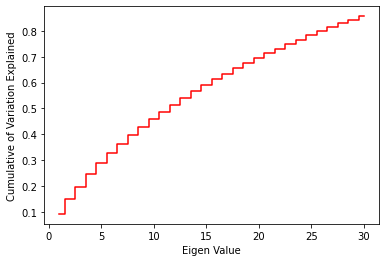

In [328]:
# Cumulative variance explained with Eigen values

plt.step(list(range(1,31)),np.cumsum(pca.explained_variance_ratio_), where='mid', color='r')
plt.ylabel('Cumulative of Variation Explained')
plt.xlabel('Eigen Value')
plt.show()  

In [329]:
pca_new = pca.transform(X_scaled)
x_final=pd.DataFrame(pca_new)

In [330]:
x_final.shape

(2926, 30)

In [331]:

# now doing train-test-split on x_final and y_bal

xpca_train, xpca_test, ypca_train, ypca_test = train_test_split(x_final, y_bal, test_size=0.25,random_state=4)

In [332]:
# Fitting logistic model on this new dataset

lrpca= LogisticRegression()

lrpca.fit(xpca_train, ypca_train)

print("Training Score for logistic model by PCA : ",lrpca.score(xpca_train, ypca_train), "\n")
print("Testing score for logistic model by PCA : ", lrpca.score(xpca_test, ypca_test))

Training Score for logistic model by PCA :  0.7233363719234275 

Testing score for logistic model by PCA :  0.6980874316939891


#### Using LASSO and Polynomial method model for performance 

In [333]:
# lasso model 

In [334]:
from sklearn.linear_model import Lasso

In [335]:
from sklearn.preprocessing import PolynomialFeatures

In [336]:
poly = PolynomialFeatures(degree = 2, interaction_only=True)

#poly = PolynomialFeatures(2)

In [337]:
X_poly = poly.fit_transform(X_scaled)
X1_train, X1_test, y1_train, y1_test = train_test_split(X_poly, y_bal, test_size=0.25, random_state=1)


lasso = Lasso(alpha=0.01)
lasso.fit(X1_train,y1_train)

print("Training score for Logistic Model with Lasso and Polynomial Feature of degree 2:",lasso.score(X1_train, y1_train))
print(" ")
print("Testing score for Logistic Model with Lasso and Polynomial Feature of degree 2:",lasso.score(X1_test, y1_test))

Training score for Logistic Model with Lasso and Polynomial Feature of degree 2: 0.7654658720482888
 
Testing score for Logistic Model with Lasso and Polynomial Feature of degree 2: 0.652950547285907


In [338]:

print ("Lasso model:", (lasso.coef_))

Lasso model: [ 0.         -0.00345599 -0.01362432 ... -0.          0.
 -0.        ]


In [339]:
print(lasso.score(X1_train, y1_train))
print(lasso.score(X1_test, y1_test))

0.7654658720482888
0.652950547285907


#### 5.E:

### Finally we are using model with cross validation and hyperparameter tuning. 
    We use logistic model, with 
    Best Params:  {'C': 0.1, 'class_weight': {1: 0.5, 0: 0.5}, 'penalty': 'l2', 'solver': 'saga'}

In [340]:
# Logistic model with hyperparameters

lr_log=LogisticRegression(C=0.1, class_weight={1: 0.5, 0: 0.5}, penalty='l2', random_state=4,
                         solver='saga')

In [341]:
lr_log.fit(x_train, y_train)

print("Training Score for logistic model : ",lr_log.score(x_train, y_train), "\n")
print("Testing score for logistic model : ", lr_log.score(x_test, y_test))

Training Score for logistic model :  0.7456700091157703 

Testing score for logistic model :  0.7240437158469946


In [342]:
y_pred1 = lr_log.predict(x_test)

print(confusion_matrix(y_test,y_pred1))

print(classification_report(y_test,y_pred1))

[[247 110]
 [ 92 283]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       357
           1       0.72      0.75      0.74       375

    accuracy                           0.72       732
   macro avg       0.72      0.72      0.72       732
weighted avg       0.72      0.72      0.72       732



In [343]:
print("Precision score for KNN Model:\n")
print(precision_score(y_test,y_pred1,average="weighted"))
print("****************************************************")
print("Recall score for KNN Model:\n")
print(recall_score(y_test,y_pred1,average="weighted"))
print("****************************************************")
print("f1_score score for KNN Model:\n")
print(f1_score(y_test,y_pred1,average="weighted"))

Precision score for KNN Model:

0.724253022113004
****************************************************
Recall score for KNN Model:

0.7240437158469946
****************************************************
f1_score score for KNN Model:

0.7237091783257962


<AxesSubplot:>

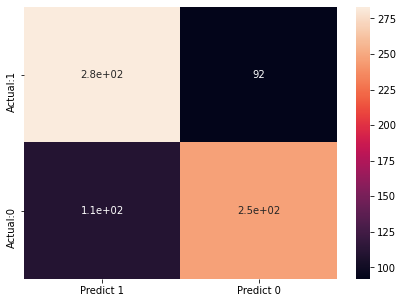

In [344]:
cm1=metrics.confusion_matrix(y_test, y_pred1, labels=[1, 0])

df_cm2 = pd.DataFrame(cm1, index = [i for i in ['Actual:1','Actual:0']],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm2, annot=True)

#### Report Conclusion:

    * Logistic Model with hyperparameters:
                 Training score = 74.56 %
                 Testing score  = 72.40 %
    
    * True Positive(TP) cases = 280
    * True Negative(TN) cases = 250
    
    * Precision score = 72.42 %
    * Recall Score = 72.40 %
    * f1 score = 72.37 %




### 5.F: Other Models :

### KNN model:

In [345]:
from sklearn.neighbors import KNeighborsClassifier

In [346]:
xknn_train, xknn_test, yknn_train, yknn_test = train_test_split(X_scaled, y_bal, test_size=0.25,random_state=4)


knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(xknn_train, yknn_train)

print("Training score for KNN Model is: ", knn.score(xknn_train,yknn_train) )

print(" ")

print("Testing score for KNN Model is: ", knn.score(xknn_test,yknn_test))

Training score for KNN Model is:  0.9288969917958068
 
Testing score for KNN Model is:  0.8920765027322405


In [347]:
test_predict = knn.predict(xknn_test)

# Printing performance metrics for test data
print("Confusion matrix for testing set is: \n")
print(confusion_matrix(yknn_test,test_predict))
print(" ")
print("Classification report for testing set is: \n")
print(classification_report(yknn_test,test_predict))

Confusion matrix for testing set is: 

[[278  79]
 [  0 375]]
 
Classification report for testing set is: 

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       357
           1       0.83      1.00      0.90       375

    accuracy                           0.89       732
   macro avg       0.91      0.89      0.89       732
weighted avg       0.91      0.89      0.89       732



In [348]:
print("Precision score for KNN Model:\n")
print(precision_score(yknn_test,test_predict,average="weighted"))
print("****************************************************")
print("Recall score for KNN Model:\n")
print(recall_score(yknn_test,test_predict,average="weighted"))
print("****************************************************")
print("f1_score score for KNN Model:\n")
print(f1_score(yknn_test,test_predict,average="weighted"))

Precision score for KNN Model:

0.9108561421246479
****************************************************
Recall score for KNN Model:

0.8920765027322405
****************************************************
f1_score score for KNN Model:

0.8905054651296592


### SVM Model:

In [349]:
from sklearn import svm

In [350]:
xsvm_train, xsvm_test, ysvm_train, ysvm_test = train_test_split(X_scaled, y_bal, test_size=0.25,random_state=4)

In [351]:

clf = svm.SVC(gamma=0.025, C=3) 
clf.fit(xsvm_train , ysvm_train)
ysvm_pred = clf.predict(xsvm_test)
    
print("SVM accuracy score for testing data is : ",accuracy_score(ysvm_test , ysvm_pred) )

SVM accuracy score for testing data is :  0.9959016393442623


In [352]:
print(confusion_matrix(ysvm_test,ysvm_pred))

[[354   3]
 [  0 375]]


In [353]:
print(classification_report(ysvm_test , ysvm_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       357
           1       0.99      1.00      1.00       375

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



In [354]:
print("Precision score: \n")
print(precision_score(ysvm_test,ysvm_pred,average='weighted'))
print(" ")
print("Recall score: \n")
print(recall_score(ysvm_test,ysvm_pred,average='weighted'))
print(" ")
print("f1 score: \n")
print(f1_score(ysvm_test,ysvm_pred,average='weighted'))

Precision score: 

0.9959341660161333
 
Recall score: 

0.9959016393442623
 
f1 score: 

0.9959011570788163


### Post Training & Conclusion:

#### 6.A:

In [359]:
# Logistic Model without hypertuning:
print("************************************************************")

print("Training Score for logistic model without hypertuning : ",log_a, "\n")
print("Testing score for logistic model without hypertuning : ", log_b)

# Logistic Model with PCA

print("*************************************************************")

print("Training Score for logistic model by PCA : ",lrpca.score(xpca_train, ypca_train), "\n")
print("Testing score for logistic model by PCA : ", lrpca.score(xpca_test, ypca_test))

# Logistic Model with Lasso and Polynomial feature

print("*************************************************************************************************")


print("Training score for Logistic Model with Lasso and Polynomial Feature of degree 2:",lasso.score(X1_train, y1_train))
print(" ")
print("Testing score for Logistic Model with Lasso and Polynomial Feature of degree 2:",lasso.score(X1_test, y1_test))

# KNN Model

print("**************************************************************************************************")
print("Training score for KNN Model is: ", knn.score(xknn_train,yknn_train) )
print(" ")
print("Testing score for KNN Model is: ", knn.score(xknn_test,yknn_test))

# SVM model
print("********************************************************")

print("SVM accuracy score for testing data is : ",accuracy_score(ysvm_test , ysvm_pred) )


************************************************************
Training Score for logistic model without hypertuning :  0.7470373746581586 

Testing score for logistic model without hypertuning :  0.73224043715847
*************************************************************
Training Score for logistic model by PCA :  0.7233363719234275 

Testing score for logistic model by PCA :  0.6980874316939891
*************************************************************************************************
Training score for Logistic Model with Lasso and Polynomial Feature of degree 2: 0.7654658720482888
 
Testing score for Logistic Model with Lasso and Polynomial Feature of degree 2: 0.652950547285907
**************************************************************************************************
Training score for KNN Model is:  0.9288969917958068
 
Testing score for KNN Model is:  0.8920765027322405
********************************************************
SVM accuracy score for testing data is


#### Conclusion: All the model accuracy scores are listed above.
    

#### 6.B: 

#### Best Model:
          
          * The best model is KNN classifier. Even though SVM model have very high testing score of 99.5 but
            KNN model is choosen because of its relative scores for training and testing data.
            
          * KNN model sounds more realistic.
          
          * KNN model testing score is 89.20%. 
          

#### 6.C Pickle file

In [302]:
# pickle file

final_file= "FMT_KK"
pickle.dump(knn, open(final_file,'wb'))

In [361]:
loaded_model= pickle.load(open(final_file, 'rb'))

In [363]:
loaded_model.predict(X_scaled)  # 1- Fail, 0- Pass

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

#### 6.D : Conclusion:

  * Following methodology was followed during modeling:
  
    1. Removing columns ith greater than 20% null values. 
    2. Filling null values with mean
    3. Removal of unique columns
    4. T-test application on dataset for null and alternate hypothesis.
    5. Checking for multicollinearity 
    6. Outliers treatment and filling them with mean values.
  

   * After doing all the process 49 columns were left in the end. 
   * Logistic model was used, accuracy score was 74%. 
   * Cross validation and hyperparameter tuning resulted in slightly better model scores. 
   
   * **KNN model performed very well** on the data. It was chosen as the best model for this classification problem. '